In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from utils_1 import (missing_values_table,find_agg,plot_bar,plot_box,plot_box_multi,plot_count,
                    convert_bytes_to_megabytes,fix_outlier,plot_hist,plot_heatmap,plot_scatter,
                    percent_missing
                    )
from sklearn.preprocessing import MinMaxScaler
# import warnings
# warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/Users/apple/Desktop/EDA_Telecom_Industry/data/Week1_challenge_data_source(CSV).csv')

In [3]:
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [4]:
# determining missing values
df_miss=missing_values_table(df)

Your selected dataframe has 55 columns.
There are 41 columns that have missing values.


In [5]:
df.isnull().sum().count()

55

In [6]:
# describe all variable
df.describe()

,Bearer Id,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
count,1.490100e+05,150000.000000,150000.000000,1.500000e+05,1.494310e+05,1.489350e+05,1.494290e+05,122172.000000,122189.000000,150000.000000,...,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500000e+05,1.500000e+05
mean,1.013887e+19,499.188200,498.800880,1.046086e+05,2.082016e+14,4.188282e+10,4.847455e+13,109.795706,17.662883,13300.045927,...,1.163407e+07,1.100941e+07,1.162685e+07,1.100175e+07,4.220447e+08,8.288398e+06,4.211005e+08,8.264799e+06,4.112121e+07,4.546434e+08
std,2.893173e+18,288.611834,288.097653,8.103762e+04,2.148809e+10,2.447443e+12,2.241637e+13,619.782739,84.793524,23971.878541,...,6.710569e+06,6.345423e+06,6.725218e+06,6.359490e+06,2.439675e+08,4.782700e+06,2.432050e+08,4.769004e+06,1.127639e+07,2.441429e+08
min,6.917538e+18,0.000000,0.000000,7.142000e+03,2.040471e+14,3.360100e+10,4.400152e+11,0.000000,0.000000,0.000000,...,5.300000e+01,1.050000e+02,4.200000e+01,3.500000e+01,2.516000e+03,5.900000e+01,3.290000e+03,1.480000e+02,2.866892e+06,7.114041e+06
25%,7.349883e+18,250.000000,251.000000,5.744050e+04,2.082014e+14,3.365130e+10,3.546071e+13,32.000000,2.000000,43.000000,...,5.833501e+06,5.517965e+06,5.777156e+06,5.475981e+06,2.104733e+08,4.128476e+06,2.101869e+08,4.145943e+06,3.322201e+07,2.431068e+08
50%,7.349883e+18,499.000000,500.000000,8.639900e+04,2.082015e+14,3.366371e+10,3.572201e+13,45.000000,5.000000,63.000000,...,1.161602e+07,1.101345e+07,1.164222e+07,1.099638e+07,4.234081e+08,8.291208e+06,4.218030e+08,8.267071e+06,4.114331e+07,4.558411e+08
75%,1.304243e+19,749.000000,750.000000,1.324302e+05,2.082018e+14,3.368349e+10,8.611970e+13,70.000000,15.000000,19710.750000,...,1.744852e+07,1.651556e+07,1.747048e+07,1.650727e+07,6.331742e+08,1.243162e+07,6.316918e+08,1.238415e+07,4.903424e+07,6.657055e+08
max,1.318654e+19,999.000000,999.000000,1.859336e+06,2.140743e+14,8.823971e+14,9.900120e+13,96923.000000,7120.000000,378160.000000,...,2.325910e+07,2.201196e+07,2.325919e+07,2.201196e+07,8.434419e+08,1.655879e+07,8.434425e+08,1.655882e+07,7.833131e+07,9.029696e+08


In [7]:
# data types
df.dtypes 

Bearer Id                                   float64
Start                                        object
Start ms                                    float64
End                                          object
End ms                                      float64
Dur. (ms)                                   float64
IMSI                                        float64
MSISDN/Number                               float64
IMEI                                        float64
Last Location Name                           object
Avg RTT DL (ms)                             float64
Avg RTT UL (ms)                             float64
Avg Bearer TP DL (kbps)                     float64
Avg Bearer TP UL (kbps)                     float64
TCP DL Retrans. Vol (Bytes)                 float64
TCP UL Retrans. Vol (Bytes)                 float64
DL TP < 50 Kbps (%)                         float64
50 Kbps < DL TP < 250 Kbps (%)              float64
250 Kbps < DL TP < 1 Mbps (%)               float64
DL TP > 1 Mb

In [8]:
df.columns

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',


In [9]:
# check the percent of missing values
percent_missing(df)

The  dataset contains 12.5 % missing values.


In [10]:
df_exp=df.copy()

In [11]:
df_exp.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [12]:
df_exp.columns

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',


In [13]:
# number of data points
print(f" There are {df_exp.shape[0]} rows and {df_exp.shape[1]} columns")

 There are 150001 rows and 55 columns


In [14]:
percent_missing(df_exp)

The  dataset contains 12.5 % missing values.


In [15]:
# identify the missing values
df_exp.isnull().sum().sort_values(ascending=False)


Nb of sec with 37500B < Vol UL              130254
Nb of sec with 6250B < Vol UL < 37500B      111843
Nb of sec with 125000B < Vol DL              97538
TCP UL Retrans. Vol (Bytes)                  96649
Nb of sec with 31250B < Vol DL < 125000B     93586
Nb of sec with 1250B < Vol UL < 6250B        92894
Nb of sec with 6250B < Vol DL < 31250B       88317
TCP DL Retrans. Vol (Bytes)                  88146
HTTP UL (Bytes)                              81810
HTTP DL (Bytes)                              81474
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Last Location Name                            1153
MSISDN/Number                                 1066
Bearer Id                                      991
Nb of sec with Vol UL < 1250B                  793
UL TP < 10 Kbps (%)                            792
10 Kbps < UL TP < 50 Kbps (%)                  792
50 Kbps < UL TP < 300 Kbps (%)                 792
UL TP > 300 Kbps (%)           

In [15]:
# outliers=[]
# for column in df_exp.columns.to_list():
#     if df_exp[column].quantile(0.95):
#         outliers.append(column)

For the actual telecom dataset, you‘re expected to conduct a full User Overview analysis & the following sub-tasks are your guidance: 
Start by identifying the top 10 handsets used by the customers.
Then, identify the top 3 handset manufacturers
Next, identify the top 5 handsets per top 3 handset manufacturer
Make a short interpretation and recommendation to marketing teams


In [18]:
# # 10 handsets used by the customers
#df = df_exp.groupby('MSISDN/Number','Handset Manufacturer').agg(
#     {'Bearer Id': 'count', 'Dur. (ms)': 'sum', 'total_data': 'sum'})
df_man= df_exp[['MSISDN/Number','Handset Manufacturer']]
percent_missing(df_man) # we can drop the missing values
df_man.dropna(axis=0, inplace=True)
df_man

The  dataset contains 0.55 % missing values.


/var/folders/pr/k1cjyyh56sv6wyyxm023snx00000gn/T/ipykernel_2746/1069815466.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_man.dropna(axis=0, inplace=True)


,MSISDN/Number,Handset Manufacturer
0,3.366496e+10,Samsung
1,3.368185e+10,Samsung
2,3.376063e+10,Samsung
3,3.375034e+10,undefined
4,3.369980e+10,Samsung
...,...,...
149995,3.366865e+10,undefined
149996,3.365069e+10,Apple
149997,3.366345e+10,Apple
149998,3.362189e+10,Apple


In [17]:
df_man.isnull().sum()

MSISDN/Number           0
Handset Manufacturer    0
dtype: int64

In [18]:
df_man

,MSISDN/Number,Handset Manufacturer
0,"33,664,962,239.00",Samsung
1,"33,681,854,413.00",Samsung
2,"33,760,627,129.00",Samsung
3,"33,750,343,200.00",undefined
4,"33,699,795,932.00",Samsung
...,...,...
149995,"33,668,648,496.00",undefined
149996,"33,650,688,697.00",Apple
149997,"33,663,449,963.00",Apple
149998,"33,621,890,103.00",Apple


In [25]:
df_man_agg = df_exp.groupby(['MSISDN/Number','Handset Manufacturer']).agg({
       'Handset Manufacturer': 'count'})
# df_man_agg.sort_values(by='Handset Manufacturer', axis=0).sort_values(by='Handset Manufacturer',
                            # ascending=False)
df_man_agg.rename(columns={'Handset Manufacturer': 'Device_counts'}).sort_values(by='Device_counts'
                            , ascending=False)[:10]

,,Device_counts
MSISDN/Number,Handset Manufacturer,
3.362632e+10,Samsung,18
3.362578e+10,Samsung,17
3.361489e+10,Samsung,17
3.365973e+10,Huawei,16
3.376054e+10,Samsung,15
3.367588e+10,Huawei,15
3.366716e+10,Samsung,13
3.376041e+10,undefined,12
3.362708e+10,Samsung,12


<AxesSubplot:xlabel='MSISDN/Number,Handset Manufacturer'>

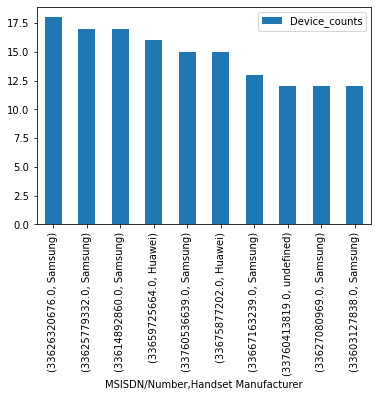

In [26]:
df_man_agg.rename(columns={'Handset Manufacturer': 'Device_counts'}).sort_values(by='Device_counts'
                            , ascending=False)[:10].plot(kind='bar')

Task 1.1 - Your employer wants to have an overview of the users’ behavior on those applications.   
Aggregate per user the following information in the column  
number of xDR sessions
Session duration
the total download (DL) and upload (UL) data
the total data volume (in Bytes) during this session for each application


In [226]:
features=['Bearer Id','IMEI' , 'Dur. (ms)', 'Total DL (Bytes)', 'Total UL (Bytes)',
'Social Media DL (Bytes)', 'Social Media UL (Bytes)', 'Youtube DL (Bytes)', 'Youtube UL (Bytes)',
'Netflix DL (Bytes)','Netflix UL (Bytes)','Google DL (Bytes)','Google UL (Bytes)','Email DL (Bytes)',
'Email UL (Bytes)','Gaming DL (Bytes)', 'Gaming UL (Bytes)']

In [227]:
# get the important dataframe for task 1.1 and check if the are missing values
df_anal=df_exp[features]
df_anal

,Bearer Id,IMEI,Dur. (ms),Total DL (Bytes),Total UL (Bytes),Social Media DL (Bytes),Social Media UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes)
0,"13,114,483,460,844,900,352.00","35,521,209,507,511.00","1,823,652.00","308,879,636.00","36,749,741.00","1,545,765.00","24,420.00","15,854,611.00","2,501,332.00","8,198,936.00","9,656,251.00","1,634,479.00","1,271,433.00","3,563,542.00","137,762.00","278,082,303.00","14,344,150.00"
1,"13,114,483,482,878,900,224.00","35,794,009,006,359.00","1,365,104.00","653,384,965.00","53,800,391.00","1,926,113.00","7,165.00","20,247,395.00","19,111,729.00","18,338,413.00","17,227,132.00","3,493,924.00","920,172.00","629,046.00","308,339.00","608,750,074.00","1,170,709.00"
2,"13,114,483,484,080,500,736.00","35,281,510,359,387.00","1,361,762.00","279,807,335.00","27,883,638.00","1,684,053.00","42,224.00","19,725,661.00","14,699,576.00","17,587,794.00","6,163,408.00","8,535,055.00","1,694,064.00","2,690,151.00","672,973.00","229,584,621.00","395,630.00"
3,"13,114,483,485,442,799,616.00","35,356,610,164,913.00","1,321,509.00","846,028,530.00","43,324,218.00","644,121.00","13,372.00","21,388,122.00","15,146,643.00","13,994,646.00","1,097,942.00","9,023,734.00","2,788,027.00","1,439,754.00","631,229.00","799,538,153.00","10,849,722.00"
4,"13,114,483,499,480,700,928.00","35,407,009,745,539.00","1,089,009.00","569,138,589.00","38,542,814.00","862,600.00","50,188.00","15,259,380.00","18,962,873.00","17,124,581.00","415,218.00","6,248,284.00","1,500,559.00","1,936,496.00","173,853.00","527,707,248.00","3,529,801.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,"7,277,825,670,196,679,680.00","35,483,109,451,938.00","81,230.00","574,175,259.00","57,628,851.00","3,464,974.00","52,091.00","16,191,667.00","11,763,428.00","17,883,703.00","19,678,161.00","9,967,603.00","2,817,311.00","57,639.00","633,237.00","526,609,673.00","9,197,207.00"
149997,"7,349,883,264,234,609,664.00","35,660,508,296,467.00","97,970.00","666,648,844.00","39,135,081.00","2,344,568.00","7,613.00","13,877,234.00","8,288,284.00","19,350,146.00","21,293,148.00","2,229,420.00","2,185,941.00","1,954,414.00","167,304.00","626,893,062.00","4,735,033.00"
149998,"13,114,483,573,367,300,096.00","35,721,209,870,907.00","98,249.00","592,786,405.00","34,912,224.00","1,245,845.00","14,394.00","22,660,510.00","1,855,903.00","9,963,942.00","5,065,760.00","3,850,890.00","2,734,579.00","1,525,734.00","532,543.00","553,539,484.00","13,394,316.00"
149999,"13,114,483,573,367,300,096.00","86,186,204,011,457.00","97,910.00","371,895,920.00","29,626,096.00","801,547.00","21,562.00","8,817,106.00","8,305,402.00","3,322,253.00","13,172,589.00","4,189,773.00","3,567,494.00","2,228,270.00","622,644.00","352,536,971.00","2,529,475.00"


In [209]:
df_anal.isnull().sum()

Bearer Id                  991
IMEI                       572
Dur. (ms)                    1
Total DL (Bytes)             1
Total UL (Bytes)             1
Social Media DL (Bytes)      0
Social Media UL (Bytes)      0
Youtube DL (Bytes)           0
Youtube UL (Bytes)           0
Netflix DL (Bytes)           0
Netflix UL (Bytes)           0
Google DL (Bytes)            0
Google UL (Bytes)            0
Email DL (Bytes)             0
Email UL (Bytes)             0
Gaming DL (Bytes)            0
Gaming UL (Bytes)            0
dtype: int64

In [228]:
percent_missing(df_anal)

The  dataset contains 0.06 % missing values.


In [229]:
# asThe  dataset contains 0.06 % missing values is not high, we can afford to drop missing values
df_clean=df_anal.dropna(axis=0)
df_clean.isnull().sum()

Bearer Id                  0
IMEI                       0
Dur. (ms)                  0
Total DL (Bytes)           0
Total UL (Bytes)           0
Social Media DL (Bytes)    0
Social Media UL (Bytes)    0
Youtube DL (Bytes)         0
Youtube UL (Bytes)         0
Netflix DL (Bytes)         0
Netflix UL (Bytes)         0
Google DL (Bytes)          0
Google UL (Bytes)          0
Email DL (Bytes)           0
Email UL (Bytes)           0
Gaming DL (Bytes)          0
Gaming UL (Bytes)          0
dtype: int64

In [230]:
# check some row
df_clean.head()

,Bearer Id,IMEI,Dur. (ms),Total DL (Bytes),Total UL (Bytes),Social Media DL (Bytes),Social Media UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes)
0,"13,114,483,460,844,900,352.00","35,521,209,507,511.00","1,823,652.00","308,879,636.00","36,749,741.00","1,545,765.00","24,420.00","15,854,611.00","2,501,332.00","8,198,936.00","9,656,251.00","1,634,479.00","1,271,433.00","3,563,542.00","137,762.00","278,082,303.00","14,344,150.00"
1,"13,114,483,482,878,900,224.00","35,794,009,006,359.00","1,365,104.00","653,384,965.00","53,800,391.00","1,926,113.00","7,165.00","20,247,395.00","19,111,729.00","18,338,413.00","17,227,132.00","3,493,924.00","920,172.00","629,046.00","308,339.00","608,750,074.00","1,170,709.00"
2,"13,114,483,484,080,500,736.00","35,281,510,359,387.00","1,361,762.00","279,807,335.00","27,883,638.00","1,684,053.00","42,224.00","19,725,661.00","14,699,576.00","17,587,794.00","6,163,408.00","8,535,055.00","1,694,064.00","2,690,151.00","672,973.00","229,584,621.00","395,630.00"
3,"13,114,483,485,442,799,616.00","35,356,610,164,913.00","1,321,509.00","846,028,530.00","43,324,218.00","644,121.00","13,372.00","21,388,122.00","15,146,643.00","13,994,646.00","1,097,942.00","9,023,734.00","2,788,027.00","1,439,754.00","631,229.00","799,538,153.00","10,849,722.00"
4,"13,114,483,499,480,700,928.00","35,407,009,745,539.00","1,089,009.00","569,138,589.00","38,542,814.00","862,600.00","50,188.00","15,259,380.00","18,962,873.00","17,124,581.00","415,218.00","6,248,284.00","1,500,559.00","1,936,496.00","173,853.00","527,707,248.00","3,529,801.00"


In [231]:
# df_clean.columns.tolist()
bytes_colum=['Total DL (Bytes)','Total UL (Bytes)','Social Media DL (Bytes)',
'Social Media UL (Bytes)','Youtube DL (Bytes)','Youtube UL (Bytes)','Netflix DL (Bytes)',
'Netflix UL (Bytes)','Google DL (Bytes)','Google UL (Bytes)','Email DL (Bytes)',
'Email UL (Bytes)','Gaming DL (Bytes)','Gaming UL (Bytes)']

In [232]:
# convert bytes to_megabytes
df_clean_bytes=convert_bytes_to_megabytes(df_clean,bytes_colum)
df_clean_bytes['Dur. (ms)']= df_clean['Dur. (ms)']
colum_arrange=['Dur. (ms)','Total DL (Bytes)','Total UL (Bytes)','Social Media DL (Bytes)',
'Social Media UL (Bytes)','Youtube DL (Bytes)','Youtube UL (Bytes)','Netflix DL (Bytes)',
'Netflix UL (Bytes)','Google DL (Bytes)','Google UL (Bytes)','Email DL (Bytes)',
'Email UL (Bytes)','Gaming DL (Bytes)','Gaming UL (Bytes)']
df_clean_bytes['Dur. (ms)']= df_clean['Dur. (ms)']
df_clean_bytes_1 = df_clean_bytes[colum_arrange]
df_clean_bytes_1


,Dur. (ms),Total DL (Bytes),Total UL (Bytes),Social Media DL (Bytes),Social Media UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes)
0,"1,823,652.00",308.88,36.75,1.55,0.02,15.85,2.50,8.20,9.66,1.63,1.27,3.56,0.14,278.08,14.34
1,"1,365,104.00",653.38,53.80,1.93,0.01,20.25,19.11,18.34,17.23,3.49,0.92,0.63,0.31,608.75,1.17
2,"1,361,762.00",279.81,27.88,1.68,0.04,19.73,14.70,17.59,6.16,8.54,1.69,2.69,0.67,229.58,0.40
3,"1,321,509.00",846.03,43.32,0.64,0.01,21.39,15.15,13.99,1.10,9.02,2.79,1.44,0.63,799.54,10.85
4,"1,089,009.00",569.14,38.54,0.86,0.05,15.26,18.96,17.12,0.42,6.25,1.50,1.94,0.17,527.71,3.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,"59,587.00",819.02,53.75,0.96,0.03,6.55,18.00,22.47,7.15,1.14,0.13,3.46,0.82,784.44,12.72
149996,"81,230.00",574.18,57.63,3.46,0.05,16.19,11.76,17.88,19.68,9.97,2.82,0.06,0.63,526.61,9.20
149997,"97,970.00",666.65,39.14,2.34,0.01,13.88,8.29,19.35,21.29,2.23,2.19,1.95,0.17,626.89,4.74
149998,"98,249.00",592.79,34.91,1.25,0.01,22.66,1.86,9.96,5.07,3.85,2.73,1.53,0.53,553.54,13.39


In [233]:

df_clean_bytes_1.describe()

,Dur. (ms),Total DL (Bytes),Total UL (Bytes),Social Media DL (Bytes),Social Media UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes)
count,"148,999.00","148,999.00","148,999.00","148,999.00","148,999.00","148,999.00","148,999.00","148,999.00","148,999.00","148,999.00","148,999.00","148,999.00","148,999.00","148,999.00","148,999.00"
mean,"104,969.78",454.69,41.12,1.80,0.03,11.63,11.01,11.63,11.00,5.75,2.06,1.79,0.47,422.09,8.29
std,"81,066.19",244.17,11.28,1.04,0.02,6.71,6.35,6.72,6.36,3.31,1.19,1.04,0.27,244.00,4.78
min,"7,142.00",7.11,2.87,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,"58,008.50",243.17,33.22,0.90,0.02,5.83,5.52,5.78,5.48,2.88,1.02,0.89,0.23,210.55,4.13
50%,"86,399.00",455.99,41.14,1.79,0.03,11.61,11.01,11.64,11.00,5.77,2.06,1.79,0.47,423.49,8.29
75%,"132,796.00",665.76,49.03,2.69,0.05,17.45,16.52,17.47,16.51,8.62,3.09,2.69,0.70,633.26,12.43
max,"1,859,336.00",902.97,78.33,3.59,0.07,23.26,22.01,23.26,22.01,11.46,4.12,3.59,0.94,843.44,16.56


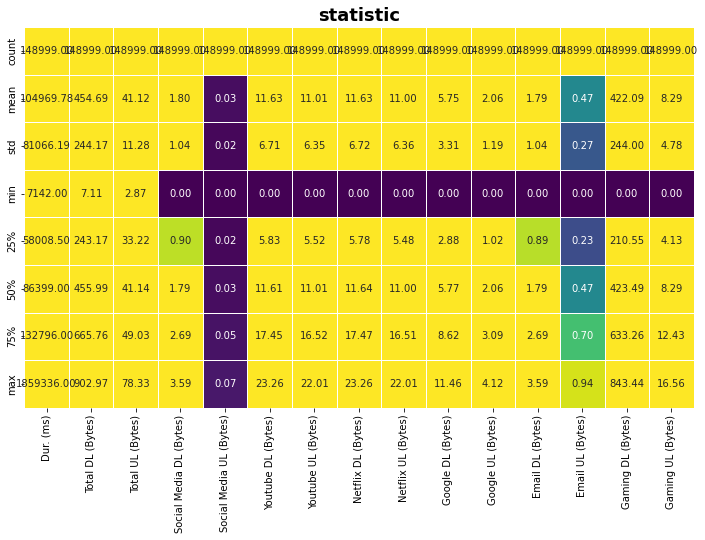

In [234]:
# explore the statistics of apps together
apps_stat=df_clean_bytes_1.describe()
plot_heatmap(apps_stat, 'statistic',cbar=False)

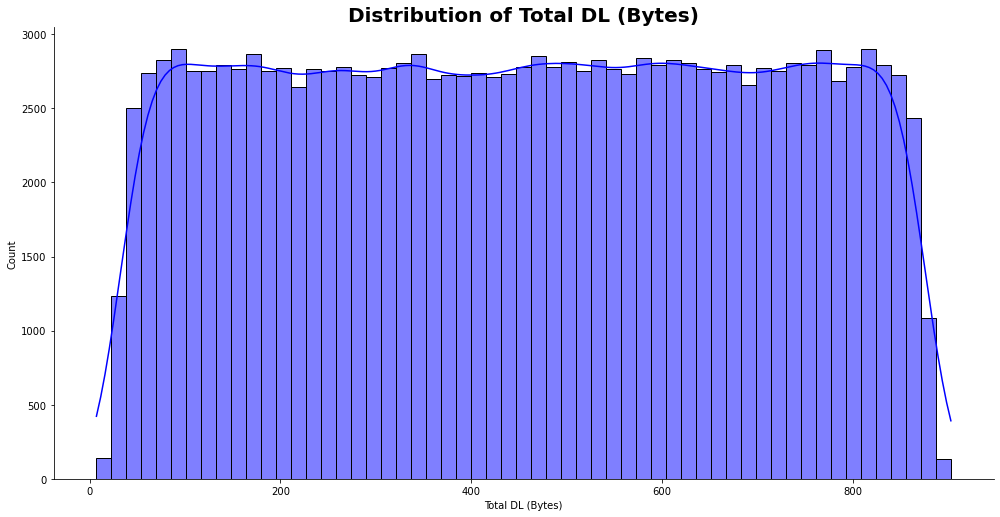

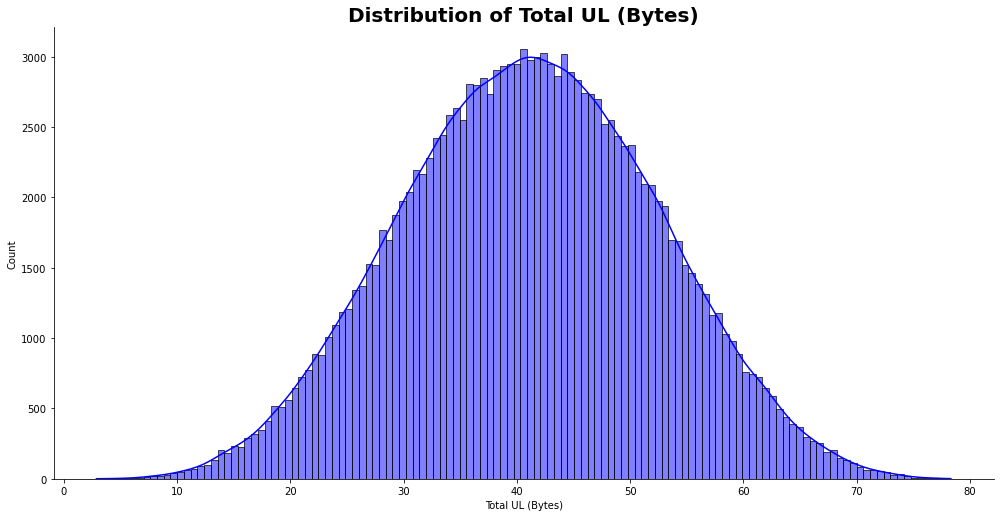

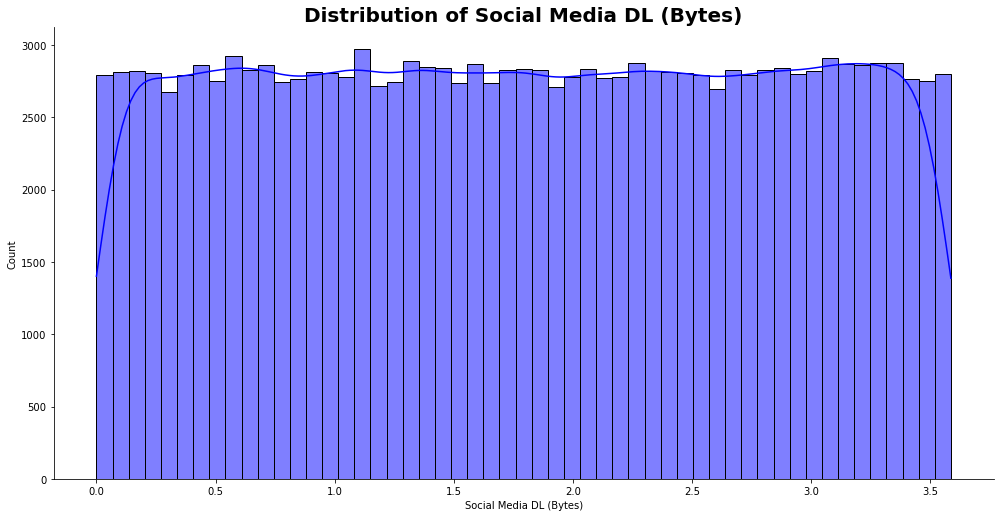

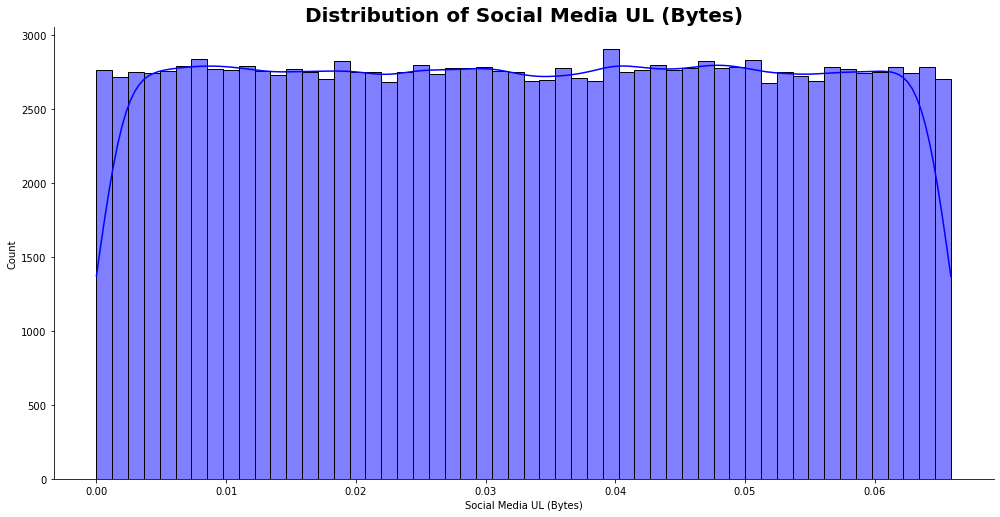

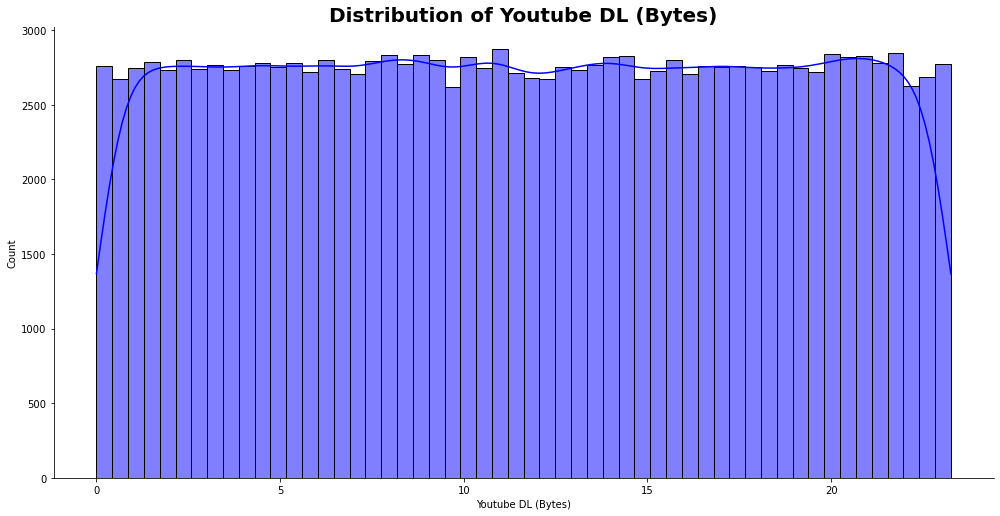

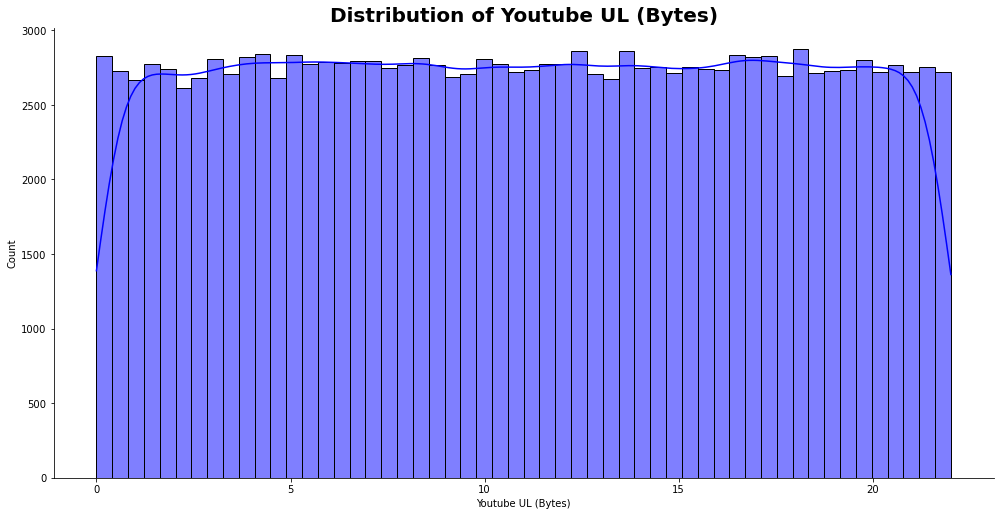

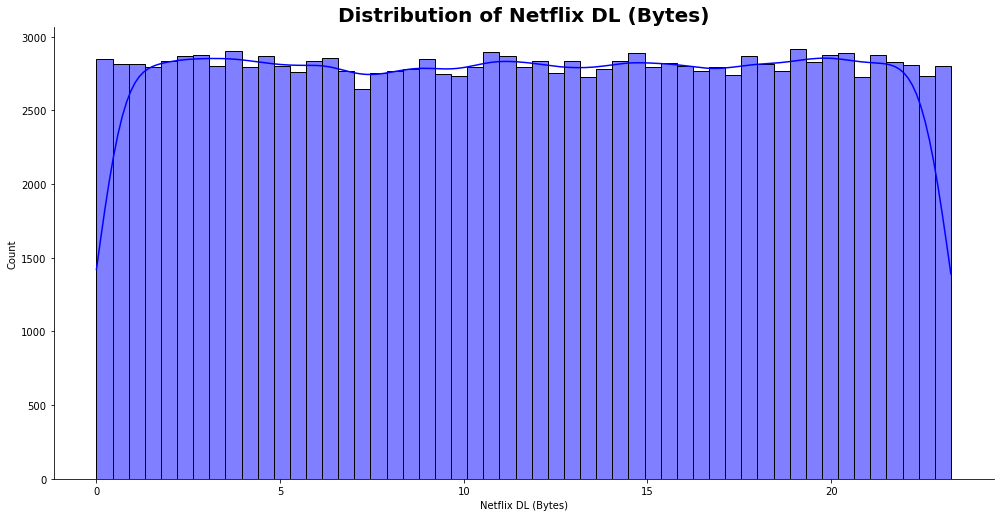

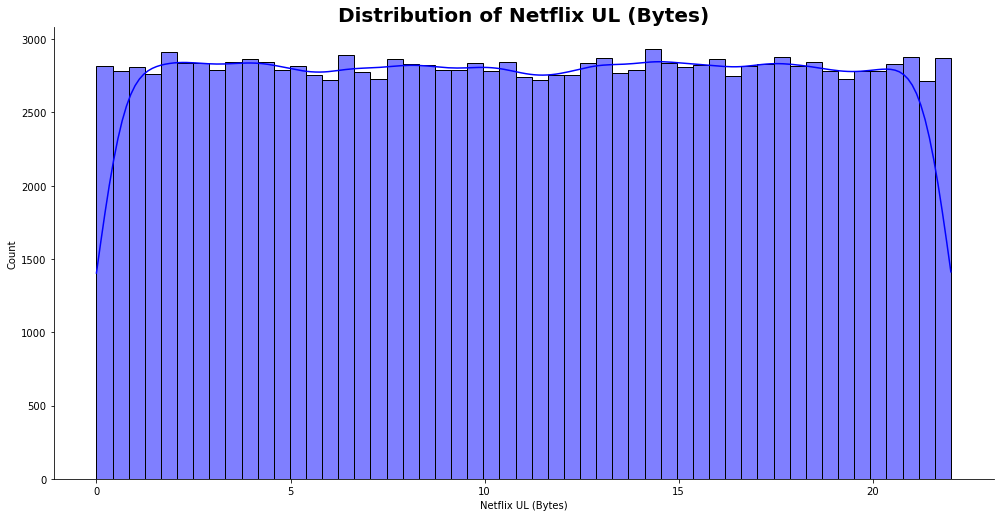

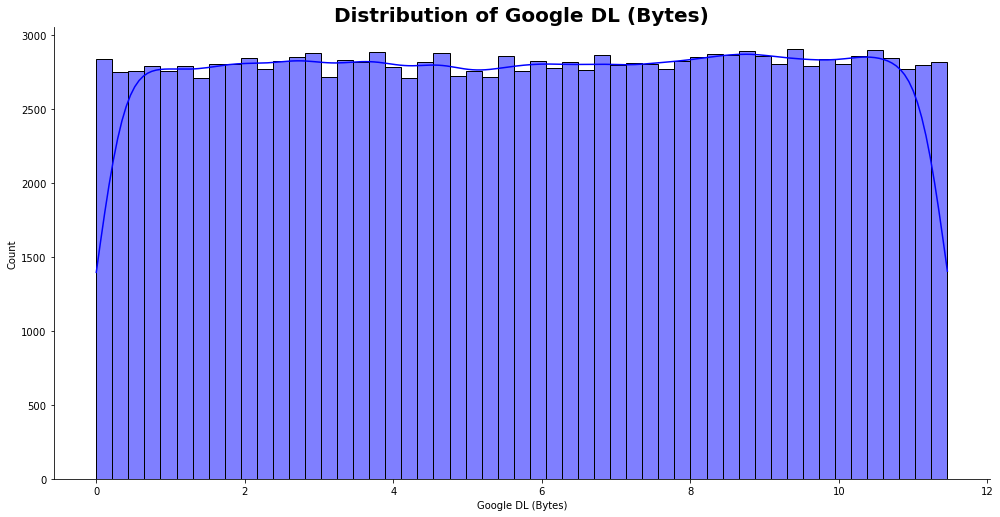

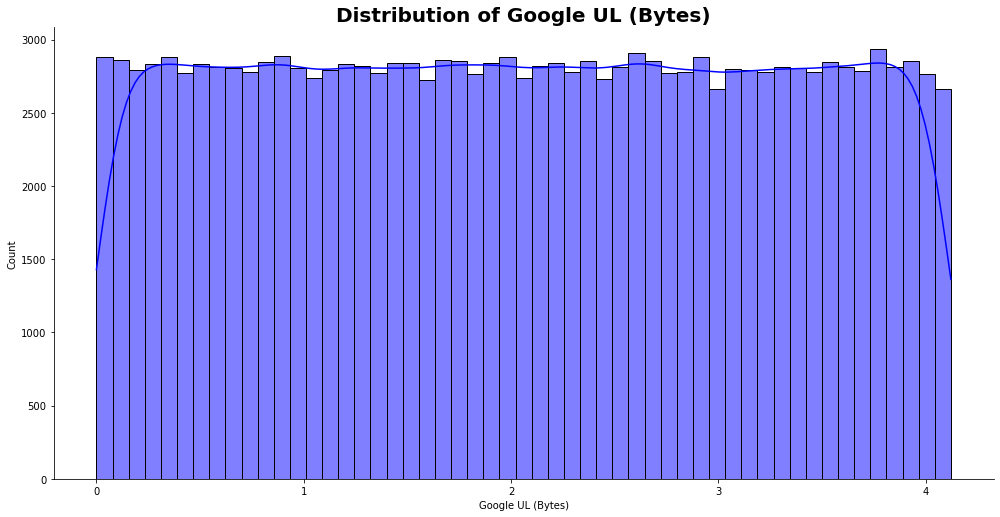

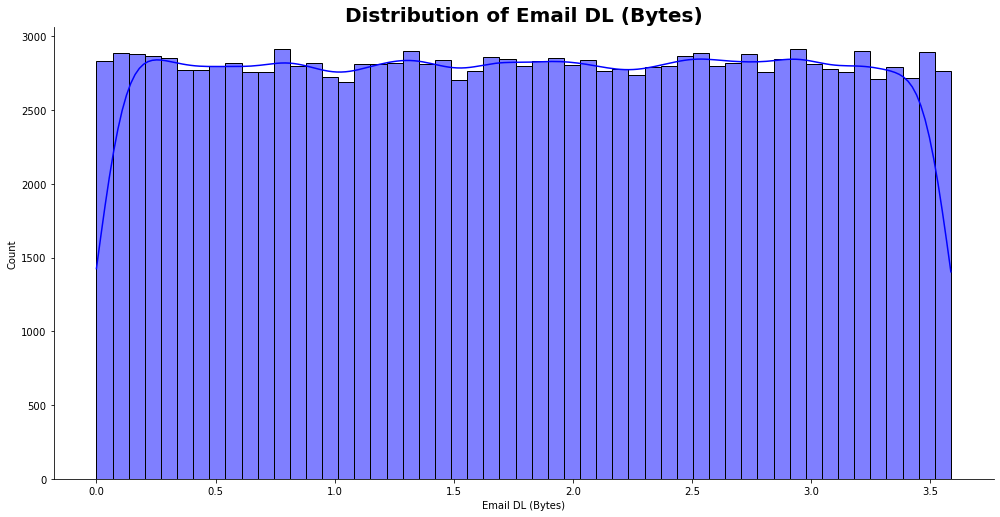

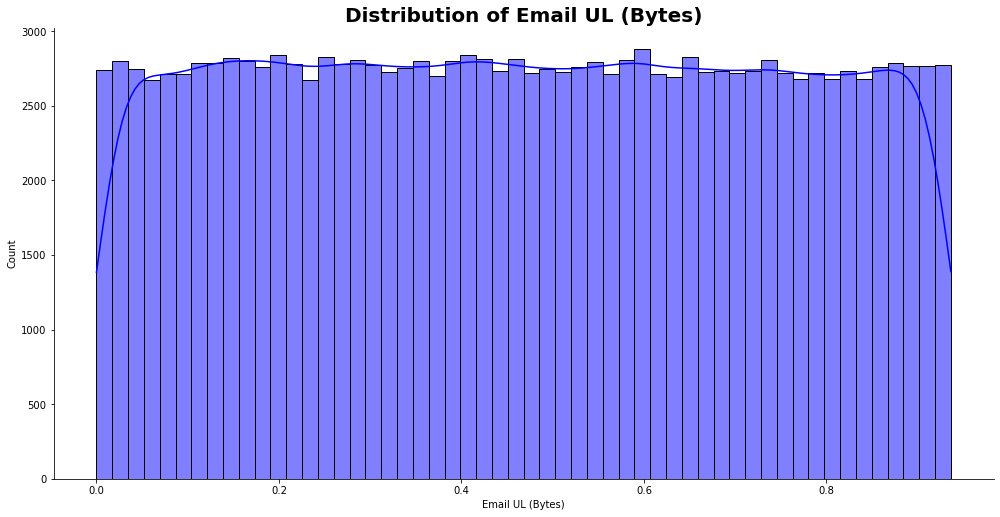

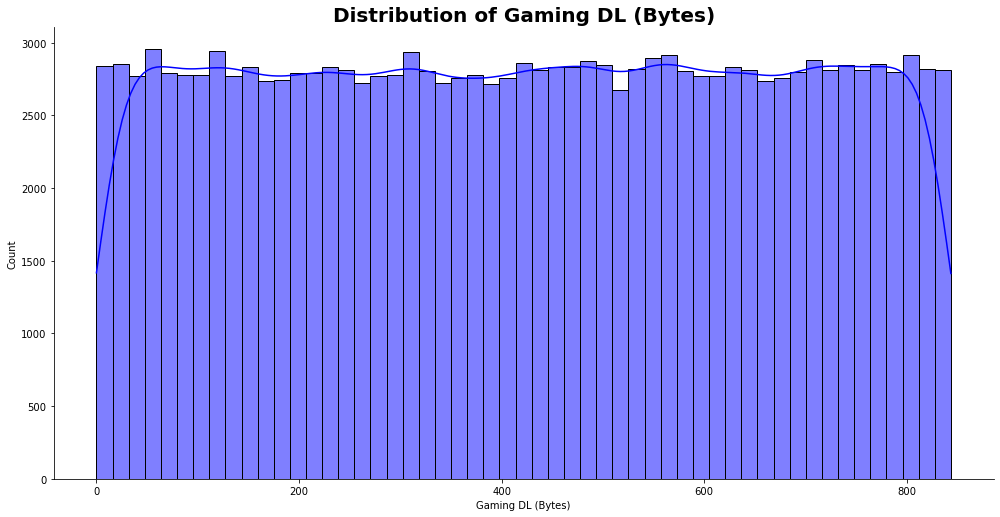

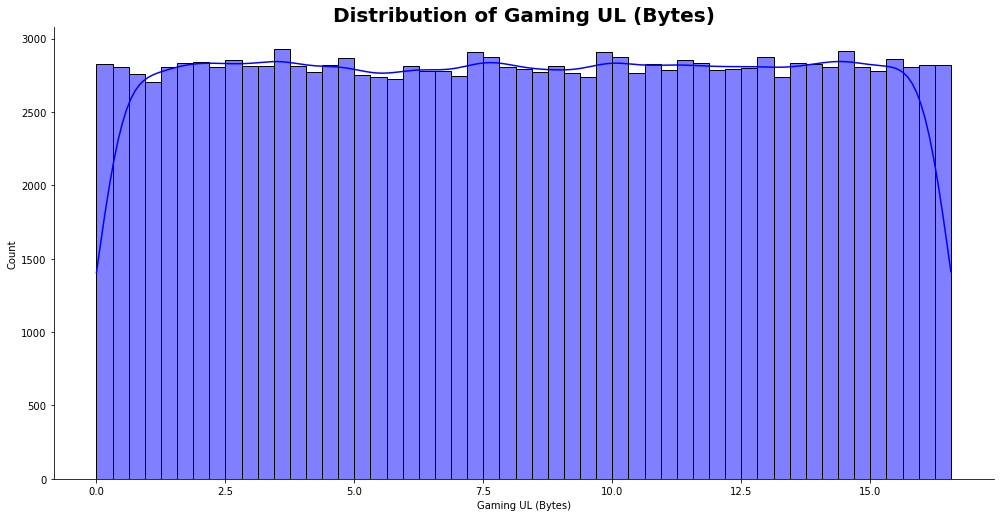

In [71]:
for column in df_clean_bytes_1.columns.tolist():
    plot_hist(df_clean_bytes_1, column, "blue")

In [80]:
df_clean_bytes['IMEI']=df_clean['IMEI'] 
df_clean_bytes

In [116]:
# the total data volume (in Bytes) during this session for each application,
# which is aggregate of all the applications provided
apps_rearage=['IMEI','Total DL (Bytes)','Total UL (Bytes)','Social Media DL (Bytes)',
'Social Media UL (Bytes)','Youtube DL (Bytes)','Youtube UL (Bytes)',
 'Netflix DL (Bytes)','Netflix UL (Bytes)','Google DL (Bytes)','Google UL (Bytes)','Email DL (Bytes)',
 'Email UL (Bytes)','Gaming DL (Bytes)','Gaming UL (Bytes)',]
df_clean_bytes=df_clean_bytes[apps_rearage]
df_clean_bytes

,IMEI,Total DL (Bytes),Total UL (Bytes),Social Media DL (Bytes),Social Media UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes)
0,"35,521,209,507,511.00",308.88,36.75,1.55,0.02,15.85,2.50,8.20,9.66,1.63,1.27,3.56,0.14,278.08,14.34
1,"35,794,009,006,359.00",653.38,53.80,1.93,0.01,20.25,19.11,18.34,17.23,3.49,0.92,0.63,0.31,608.75,1.17
2,"35,281,510,359,387.00",279.81,27.88,1.68,0.04,19.73,14.70,17.59,6.16,8.54,1.69,2.69,0.67,229.58,0.40
3,"35,356,610,164,913.00",846.03,43.32,0.64,0.01,21.39,15.15,13.99,1.10,9.02,2.79,1.44,0.63,799.54,10.85
4,"35,407,009,745,539.00",569.14,38.54,0.86,0.05,15.26,18.96,17.12,0.42,6.25,1.50,1.94,0.17,527.71,3.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,"35,332,510,508,318.00",819.02,53.75,0.96,0.03,6.55,18.00,22.47,7.15,1.14,0.13,3.46,0.82,784.44,12.72
149996,"35,483,109,451,938.00",574.18,57.63,3.46,0.05,16.19,11.76,17.88,19.68,9.97,2.82,0.06,0.63,526.61,9.20
149997,"35,660,508,296,467.00",666.65,39.14,2.34,0.01,13.88,8.29,19.35,21.29,2.23,2.19,1.95,0.17,626.89,4.74
149998,"35,721,209,870,907.00",592.79,34.91,1.25,0.01,22.66,1.86,9.96,5.07,3.85,2.73,1.53,0.53,553.54,13.39


Conduct a Non-Graphical Univariate Analysis by computing dispersion parameters for each quantitative variable and provide useful interpretation.

In [191]:
df_clean_bytes['Total DL (Bytes)'].describe()

count   148,999.00
mean        454.69
std         244.17
min           7.11
25%         243.17
50%         455.99
75%         665.76
max         902.97
Name: Total DL (Bytes), dtype: float64

In [235]:
five_first_app=['Gaming DL (Bytes)','Youtube DL (Bytes)','Youtube UL (Bytes)','Gaming UL (Bytes)','Google DL (Bytes)']
df_clean_bytes_1[five_first_app].describe()

,Gaming DL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Gaming UL (Bytes),Google DL (Bytes)
count,"148,999.00","148,999.00","148,999.00","148,999.00","148,999.00"
mean,422.09,11.63,11.01,8.29,5.75
std,244.00,6.71,6.35,4.78,3.31
min,0.00,0.00,0.00,0.00,0.00
25%,210.55,5.83,5.52,4.13,2.88
50%,423.49,11.61,11.01,8.29,5.77
75%,633.26,17.45,16.52,12.43,8.62
max,843.44,23.26,22.01,16.56,11.46


Bivariate Analysis – explore the relationship between each application & the total DL+UL data using appropriate methods and interpret your findings. 

In [236]:
df_clean_bytes_1.columns

Index(['Dur. (ms)', 'Total DL (Bytes)', 'Total UL (Bytes)',
       'Social Media DL (Bytes)', 'Social Media UL (Bytes)',
       'Youtube DL (Bytes)', 'Youtube UL (Bytes)', 'Netflix DL (Bytes)',
       'Netflix UL (Bytes)', 'Google DL (Bytes)', 'Google UL (Bytes)',
       'Email DL (Bytes)', 'Email UL (Bytes)', 'Gaming DL (Bytes)',
       'Gaming UL (Bytes)'],
      dtype='object')

In [238]:
df_apps_agg = df_clean_bytes_1.groupby(['Dur. (ms)']).agg({
       'Social Media DL (Bytes)': 'mean',
       'Social Media UL (Bytes)':'mean',
       'Youtube DL (Bytes)':'mean',
       'Youtube UL (Bytes)':'mean',
       'Google DL (Bytes)':'mean',
       'Google UL (Bytes)':'mean',
       'Email DL (Bytes)':'mean',
       'Email UL (Bytes)':'mean',
       'Gaming DL (Bytes)':'mean',
       'Gaming UL (Bytes)':'mean'
       }
)
# aggregate the application volume in Bytes
df_apps_agg

,Social Media DL (Bytes),Social Media UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes)
Dur. (ms),,,,,,,,,,
"7,142.00",1.05,0.02,11.83,3.43,5.91,3.02,2.07,0.20,504.39,12.94
"7,146.00",1.15,0.01,8.21,11.57,1.97,2.71,0.99,0.09,618.41,0.91
"7,189.00",3.41,0.02,4.02,18.36,4.30,1.16,0.80,0.23,188.55,15.13
"7,258.00",2.44,0.05,21.46,13.69,9.31,0.70,1.40,0.23,755.86,11.70
"7,267.00",1.24,0.01,13.26,15.56,6.66,0.48,0.15,0.91,135.39,7.93
...,...,...,...,...,...,...,...,...,...,...
"1,686,493.00",3.36,0.01,19.24,19.54,3.90,4.02,2.71,0.90,382.90,2.03
"1,772,931.00",0.86,0.07,3.65,7.43,7.20,0.28,0.26,0.08,319.12,14.59
"1,823,652.00",1.55,0.02,15.85,2.50,1.63,1.27,3.56,0.14,278.08,14.34


Gaming DL (Bytes)         843.43
Youtube DL (Bytes)         23.26
Youtube UL (Bytes)         22.01
Gaming UL (Bytes)          16.56
Google DL (Bytes)          11.46
Google UL (Bytes)           4.12
Social Media DL (Bytes)     3.59
Email DL (Bytes)            3.59
Email UL (Bytes)            0.94
Social Media UL (Bytes)     0.07
dtype: float64


Text(0.5, 0.98, 'Application downloads in Megabytes')

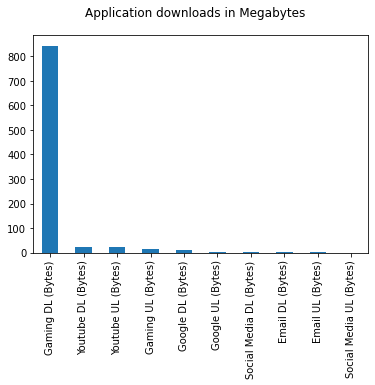

In [239]:
# df_apps_agg.min().plot(kind='bar')
# df_apps_agg.max().plot(kind='bar')
print(df_apps_agg.max().sort_values(ascending=False))
axes=df_apps_agg.max().sort_values(ascending=False).plot(kind='bar')
plt.suptitle("Application downloads in Megabytes")

Task 1.2.
Conduct an exploratory data analysis on those data & communicate useful insights. Ensure that you identify and treat all missing values and outliers in the dataset by replacing by the mean of the corresponding column.

In [103]:
# clean dataset
df_clean

,Bearer Id,IMEI,Dur. (ms),Total DL (Bytes),Total UL (Bytes),Social Media DL (Bytes),Social Media UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes)
0,"13,114,483,460,844,900,352.00","35,521,209,507,511.00","1,823,652.00",308.88,36.75,1.55,0.02,15.85,2.50,8.20,9.66,1.63,1.27,3.56,0.14,278.08,14.34
1,"13,114,483,482,878,900,224.00","35,794,009,006,359.00","1,365,104.00",653.38,53.80,1.93,0.01,20.25,19.11,18.34,17.23,3.49,0.92,0.63,0.31,608.75,1.17
2,"13,114,483,484,080,500,736.00","35,281,510,359,387.00","1,361,762.00",279.81,27.88,1.68,0.04,19.73,14.70,17.59,6.16,8.54,1.69,2.69,0.67,229.58,0.40
3,"13,114,483,485,442,799,616.00","35,356,610,164,913.00","1,321,509.00",846.03,43.32,0.64,0.01,21.39,15.15,13.99,1.10,9.02,2.79,1.44,0.63,799.54,10.85
4,"13,114,483,499,480,700,928.00","35,407,009,745,539.00","1,089,009.00",569.14,38.54,0.86,0.05,15.26,18.96,17.12,0.42,6.25,1.50,1.94,0.17,527.71,3.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,"13,042,425,979,329,300,480.00","35,332,510,508,318.00","59,587.00",819.02,53.75,0.96,0.03,6.55,18.00,22.47,7.15,1.14,0.13,3.46,0.82,784.44,12.72
149996,"7,277,825,670,196,679,680.00","35,483,109,451,938.00","81,230.00",574.18,57.63,3.46,0.05,16.19,11.76,17.88,19.68,9.97,2.82,0.06,0.63,526.61,9.20
149997,"7,349,883,264,234,609,664.00","35,660,508,296,467.00","97,970.00",666.65,39.14,2.34,0.01,13.88,8.29,19.35,21.29,2.23,2.19,1.95,0.17,626.89,4.74
149998,"13,114,483,573,367,300,096.00","35,721,209,870,907.00","98,249.00",592.79,34.91,1.25,0.01,22.66,1.86,9.96,5.07,3.85,2.73,1.53,0.53,553.54,13.39


In [23]:
df_clean.describe()

,Bearer Id,IMEI,Dur. (ms),Total DL (Bytes),Total UL (Bytes),Social Media DL (Bytes),Social Media UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes)
count,"148,999.00","148,999.00","148,999.00","148,999.00","148,999.00","148,999.00","148,999.00","148,999.00","148,999.00","148,999.00","148,999.00","148,999.00","148,999.00","148,999.00","148,999.00","148,999.00","148,999.00"
mean,"10,138,996,406,118,193,152.00","48,479,962,865,752.38","104,969.78","454,686,266.12","41,122,129.29","1,795,222.21","32,925.14","11,633,037.02","11,009,490.68","11,625,906.15","11,002,711.39","5,751,479.52","2,056,546.12","1,791,623.17","467,414.53","422,088,998.05","8,289,989.44"
std,"2,893,160,509,803,683,328.00","22,420,066,365,943.95","81,066.19","244,168,993.49","11,277,343.15","1,035,526.76","19,010.20","6,711,058.22","6,345,386.48","6,724,865.74","6,358,546.37","3,309,137.40","1,189,952.45","1,035,853.71","269,978.46","243,995,848.36","4,781,881.16"
min,"6,917,537,518,543,529,984.00","440,015,202,000.00","7,142.00","7,114,041.00","2,866,892.00",12.00,0.00,53.00,105.00,42.00,35.00,207.00,3.00,14.00,2.00,"2,516.00",59.00
25%,"7,349,883,246,975,129,600.00","35,460,708,897,832.00","58,008.50","243,168,698.50","33,220,968.00","899,001.00","16,432.50","5,833,251.50","5,517,999.00","5,777,630.00","5,477,385.00","2,882,506.00","1,024,083.00","892,634.50","233,439.00","210,554,694.50","4,131,108.00"
50%,"7,349,883,264,156,959,744.00","35,722,106,561,183.00","86,399.00","455,992,072.00","41,143,958.00","1,794,264.00","32,920.00","11,613,122.00","11,011,989.00","11,639,691.00","10,999,538.00","5,766,434.00","2,055,057.00","1,793,293.00","466,401.00","423,492,394.00","8,291,736.00"
75%,"13,042,425,978,957,848,576.00","86,119,704,676,500.00","132,796.00","665,757,136.00","49,034,239.00","2,694,903.50","49,337.00","17,447,633.50","16,515,218.00","17,468,720.00","16,505,588.50","8,624,594.50","3,088,454.50","2,689,576.00","700,492.50","633,261,121.00","12,432,568.00"
max,"13,186,541,167,134,199,808.00","99,001,201,327,774.00","1,859,336.00","902,969,616.00","78,331,311.00","3,586,064.00","65,870.00","23,259,098.00","22,011,962.00","23,259,189.00","22,011,955.00","11,462,832.00","4,121,357.00","3,586,146.00","936,418.00","843,441,889.00","16,558,794.00"


In [133]:
# lets look at the download per client
df_downloads= df_anal[['IMEI','Total DL (Bytes)' , 'Total UL (Bytes)']]
percent_missing(df_downloads)
df_downloads.isnull().sum()

The  dataset contains 0.13 % missing values.


IMEI                572
Total DL (Bytes)      1
Total UL (Bytes)      1
dtype: int64

In [90]:
# df_downloads_clean=df_downloads.dropna(axis=0)
# df_downloads_clean

Bivariate Analysis – explore the relationship between each application & the total DL+UL data using appropriate methods and interpret your findings. 

In [243]:
df_clean_bytes_1['total DL+UL']= df_clean_bytes_1['Total DL (Bytes)'] + df_clean_bytes_1['Total UL (Bytes)']
# df_clean_bytes.drop('total DL+UL DL+UL',inplace= True)
# df_clean_bytes.drop(['total DL+UL DL+UL'], axis=1,inplace= True)
df_clean_bytes_1

,Dur. (ms),Total DL (Bytes),Total UL (Bytes),Social Media DL (Bytes),Social Media UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),total DL+UL
0,"1,823,652.00",308.88,36.75,1.55,0.02,15.85,2.50,8.20,9.66,1.63,1.27,3.56,0.14,278.08,14.34,345.63
1,"1,365,104.00",653.38,53.80,1.93,0.01,20.25,19.11,18.34,17.23,3.49,0.92,0.63,0.31,608.75,1.17,707.19
2,"1,361,762.00",279.81,27.88,1.68,0.04,19.73,14.70,17.59,6.16,8.54,1.69,2.69,0.67,229.58,0.40,307.69
3,"1,321,509.00",846.03,43.32,0.64,0.01,21.39,15.15,13.99,1.10,9.02,2.79,1.44,0.63,799.54,10.85,889.35
4,"1,089,009.00",569.14,38.54,0.86,0.05,15.26,18.96,17.12,0.42,6.25,1.50,1.94,0.17,527.71,3.53,607.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,"59,587.00",819.02,53.75,0.96,0.03,6.55,18.00,22.47,7.15,1.14,0.13,3.46,0.82,784.44,12.72,872.76
149996,"81,230.00",574.18,57.63,3.46,0.05,16.19,11.76,17.88,19.68,9.97,2.82,0.06,0.63,526.61,9.20,631.80
149997,"97,970.00",666.65,39.14,2.34,0.01,13.88,8.29,19.35,21.29,2.23,2.19,1.95,0.17,626.89,4.74,705.78
149998,"98,249.00",592.79,34.91,1.25,0.01,22.66,1.86,9.96,5.07,3.85,2.73,1.53,0.53,553.54,13.39,627.70


In [244]:
list_app=['Social Media DL (Bytes)','Youtube DL (Bytes)','Netflix DL (Bytes)',
 'Google DL (Bytes)', 'Email DL (Bytes)','Gaming DL (Bytes)','total DL+UL']

<AxesSubplot:>

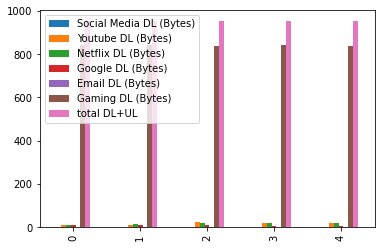

In [245]:
df_1=df_clean_bytes_1.sort_values(by=['total DL+UL'], ascending=False).reset_index(drop=True).head(5)
df_1[list_app].plot(kind='bar')

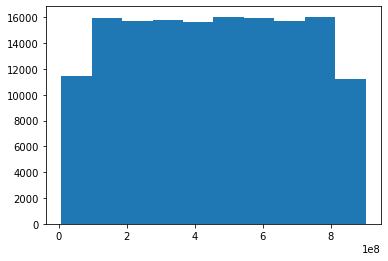

In [123]:
count, bins, ignored =plt.hist(df_downloads_clean['Total DL (Bytes)'])



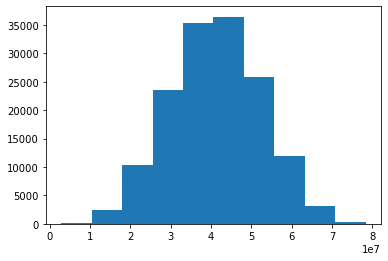

In [122]:
count, bins, ignored =plt.hist(df_downloads_clean['Total UL (Bytes)'])
plt.show()

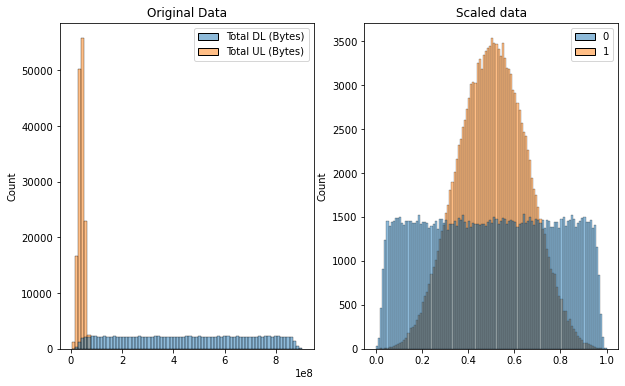

In [130]:
# mix-max scale the data between 0 and 1
minmax_scaler = MinMaxScaler()

minmax_scaler = MinMaxScaler()
def scaler(df):
    scaled_data = minmax_scaler.fit_transform(df)

    # plot both together to compare
    fig, ax = plt.subplots(1,2, figsize=(10, 6))
    sns.histplot(df, ax=ax[0])
    ax[0].set_title("Original Data")
    sns.histplot(scaled_data, ax=ax[1])
    ax[1].set_title("Scaled data")
    
scaler(df_downloads_clean[['Total DL (Bytes)' , 'Total UL (Bytes)']])

In [131]:
df_clean.dtypes

Bearer Id                  float64
IMEI                       float64
Dur. (ms)                  float64
Total DL (Bytes)           float64
Total UL (Bytes)           float64
Social Media DL (Bytes)    float64
Social Media UL (Bytes)    float64
Youtube DL (Bytes)         float64
Youtube UL (Bytes)         float64
Netflix DL (Bytes)         float64
Netflix UL (Bytes)         float64
Google DL (Bytes)          float64
Google UL (Bytes)          float64
Email DL (Bytes)           float64
Email UL (Bytes)           float64
Gaming DL (Bytes)          float64
Gaming UL (Bytes)          float64
dtype: object

Utility function

In [132]:
# Function to calculate missing values by column
def missing_values_table(df):
    # Total missing values
    mis_val = df.isnull().sum()

    # Percentage of missing values
    mis_val_percent = 100 * df.isnull().sum() / len(df)

    # dtype of missing values
    mis_val_dtype = df.dtypes

    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent, mis_val_dtype], axis=1)

    # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values', 2: 'Dtype'})

    # Sort the table by percentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)

    # Print some summary information
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
          " columns that have missing values.")

    # Return the dataframe with missing information
    return mis_val_table_ren_columns

def format_float(value):
    return f'{value:,.2f}'

def find_agg(df:pd.DataFrame, agg_column:str, agg_metric:str, col_name:str, top:int, order=False )->pd.DataFrame:
    
    new_df = df.groupby(agg_column)[agg_column].agg(agg_metric).reset_index(name=col_name).\
                        sort_values(by=col_name, ascending=order)[:top]
    
    return new_df

def convert_bytes_to_megabytes(df, bytes_data):
    """
        This function takes the dataframe and the column which has the bytes values
        returns the megabytesof that value
        
        Args:
        -----
        df: dataframe
        bytes_data: column with bytes values
        
        Returns:
        --------
        A series
    """
    
    megabyte = 1*10e+5
    df[bytes_data] = df[bytes_data] / megabyte
    return df[bytes_data]

def fix_outlier(df, column):
    df[column] = np.where(df[column] > df[column].quantile(0.95), df[column].median(),df[column])
    
    return df[column]


###################################PLOTTING FUNCTIONS###################################

def plot_hist(df:pd.DataFrame, column:str, color:str)->None:
    # plt.figure(figsize=(15, 10))
    # fig, ax = plt.subplots(1, figsize=(12, 7))
    sns.displot(data=df, x=column, color=color, kde=True, height=7, aspect=2)
    plt.title(f'Distribution of {column}', size=20, fontweight='bold')
    plt.show()

def plot_count(df:pd.DataFrame, column:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.countplot(data=df, x=column)
    plt.title(f'Distribution of {column}', size=20, fontweight='bold')
    plt.show()
    
def plot_bar(df:pd.DataFrame, x_col:str, y_col:str, title:str, xlabel:str, ylabel:str)->None:
    plt.figure(figsize=(12, 7))
    sns.barplot(data = df, x=x_col, y=y_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.yticks( fontsize=14)
    plt.xlabel(xlabel, fontsize=16)
    plt.ylabel(ylabel, fontsize=16)
    plt.show()

def plot_heatmap(df:pd.DataFrame, title:str, cbar=False)->None:
    plt.figure(figsize=(12, 7))
    sns.heatmap(df, annot=True, cmap='viridis', vmin=0, vmax=1, fmt='.2f', linewidths=.7, cbar=cbar )
    plt.title(title, size=18, fontweight='bold')
    plt.show()

def plot_box(df:pd.DataFrame, x_col:str, title:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.boxplot(data = df, x=x_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.show()

def plot_box_multi(df:pd.DataFrame, x_col:str, y_col:str, title:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.boxplot(data = df, x=x_col, y=y_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.yticks( fontsize=14)
    plt.show()

def plot_scatter(df: pd.DataFrame, x_col: str, y_col: str, title: str, hue: str, style: str) -> None:
    plt.figure(figsize=(12, 7))
    sns.scatterplot(data = df, x=x_col, y=y_col, hue=hue, style=style)
    plt.title(title, size=20)
    plt.xticks(fontsize=14)
    plt.yticks( fontsize=14)
    plt.show()


pd.options.display.float_format = format_float

Univariate analysis

Data Exploration or Exploratory data analysis (EDA) is an approach to analyzing data sets to summarize their main characteristics which include:

detection of mistakes, outliers or abnormalities
determining relationships among the explanatory variables
assessing the relationships between explanatory and outcome variables

In [86]:
df_clean

,Bearer Id,IMEI,Dur. (ms),Total DL (Bytes),Total UL (Bytes),Social Media DL (Bytes),Social Media UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes)
0,"13,114,483,460,844,900,352.00","35,521,209,507,511.00","1,823,652.00",308.88,36.75,1.55,0.02,15.85,2.50,8.20,9.66,1.63,1.27,3.56,0.14,278.08,14.34
1,"13,114,483,482,878,900,224.00","35,794,009,006,359.00","1,365,104.00",653.38,53.80,1.93,0.01,20.25,19.11,18.34,17.23,3.49,0.92,0.63,0.31,608.75,1.17
2,"13,114,483,484,080,500,736.00","35,281,510,359,387.00","1,361,762.00",279.81,27.88,1.68,0.04,19.73,14.70,17.59,6.16,8.54,1.69,2.69,0.67,229.58,0.40
3,"13,114,483,485,442,799,616.00","35,356,610,164,913.00","1,321,509.00",846.03,43.32,0.64,0.01,21.39,15.15,13.99,1.10,9.02,2.79,1.44,0.63,799.54,10.85
4,"13,114,483,499,480,700,928.00","35,407,009,745,539.00","1,089,009.00",569.14,38.54,0.86,0.05,15.26,18.96,17.12,0.42,6.25,1.50,1.94,0.17,527.71,3.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,"13,042,425,979,329,300,480.00","35,332,510,508,318.00","59,587.00",819.02,53.75,0.96,0.03,6.55,18.00,22.47,7.15,1.14,0.13,3.46,0.82,784.44,12.72
149996,"7,277,825,670,196,679,680.00","35,483,109,451,938.00","81,230.00",574.18,57.63,3.46,0.05,16.19,11.76,17.88,19.68,9.97,2.82,0.06,0.63,526.61,9.20
149997,"7,349,883,264,234,609,664.00","35,660,508,296,467.00","97,970.00",666.65,39.14,2.34,0.01,13.88,8.29,19.35,21.29,2.23,2.19,1.95,0.17,626.89,4.74
149998,"13,114,483,573,367,300,096.00","35,721,209,870,907.00","98,249.00",592.79,34.91,1.25,0.01,22.66,1.86,9.96,5.07,3.85,2.73,1.53,0.53,553.54,13.39


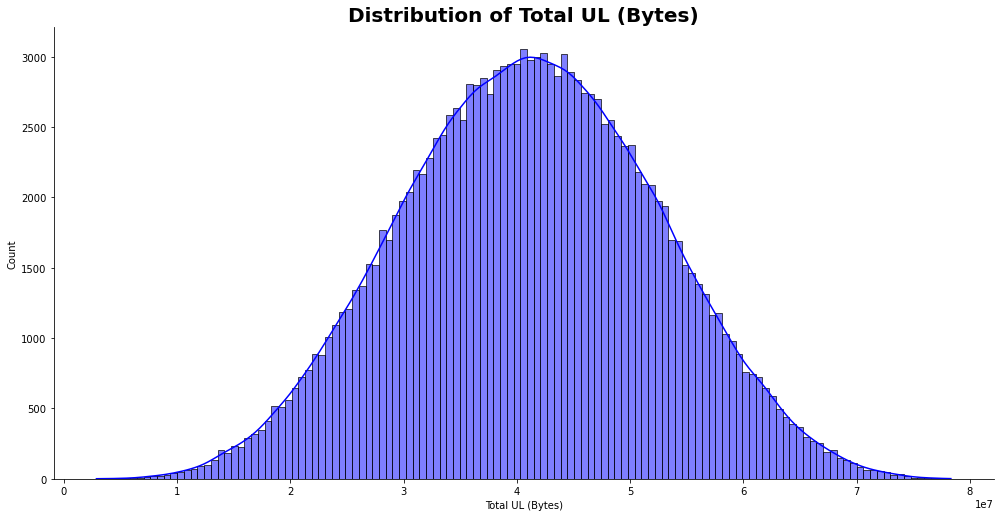

In [147]:
df_clean['Bearer Id']
plot_hist(df_clean, 'Total UL (Bytes)', "blue")

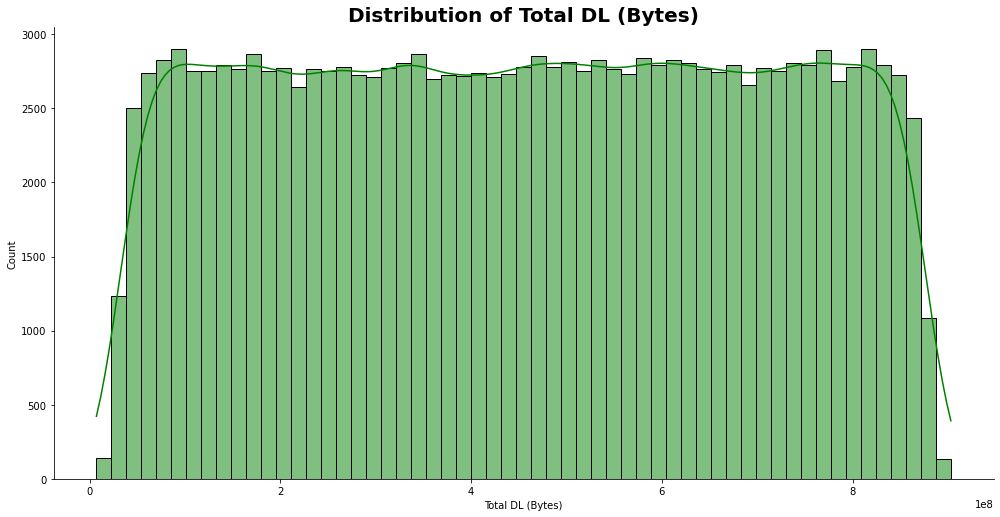

In [149]:
plot_hist(df_clean, 'Total DL (Bytes)', "green")

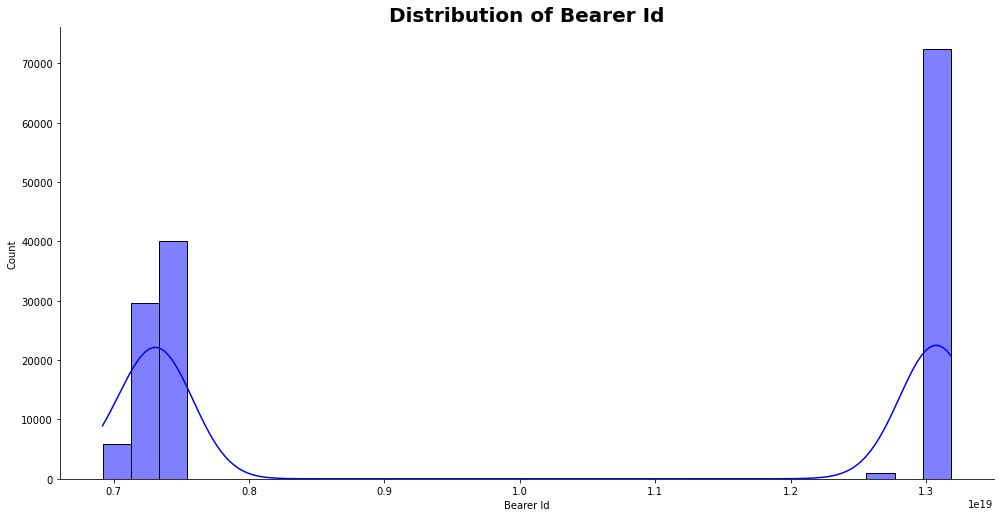

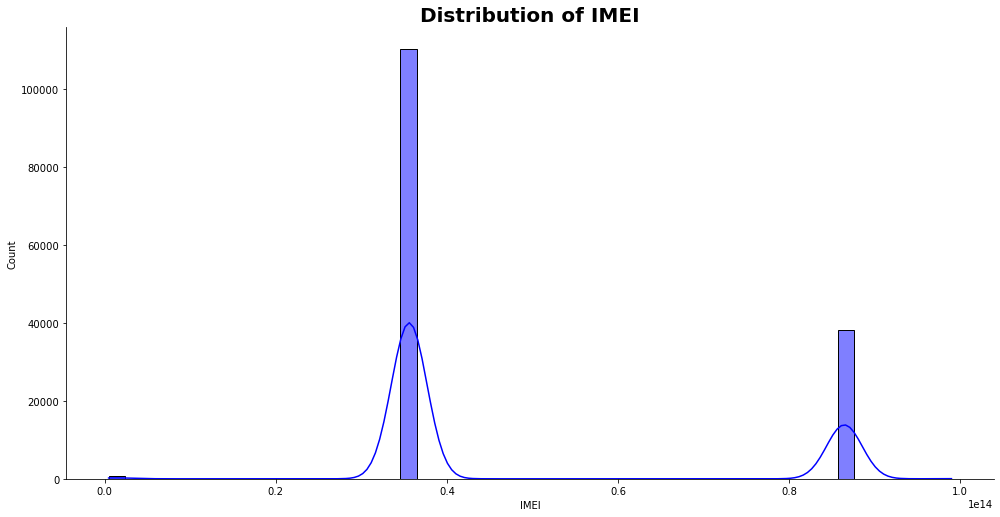

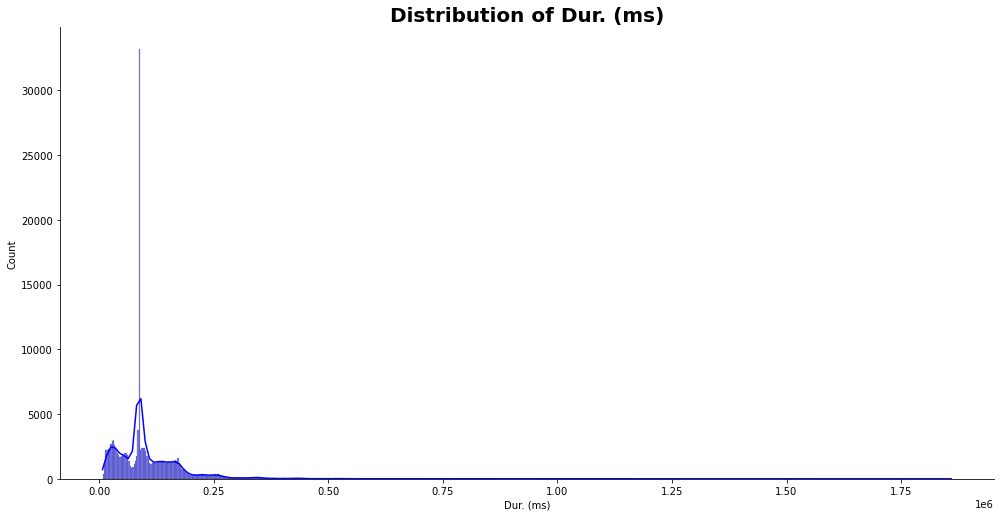

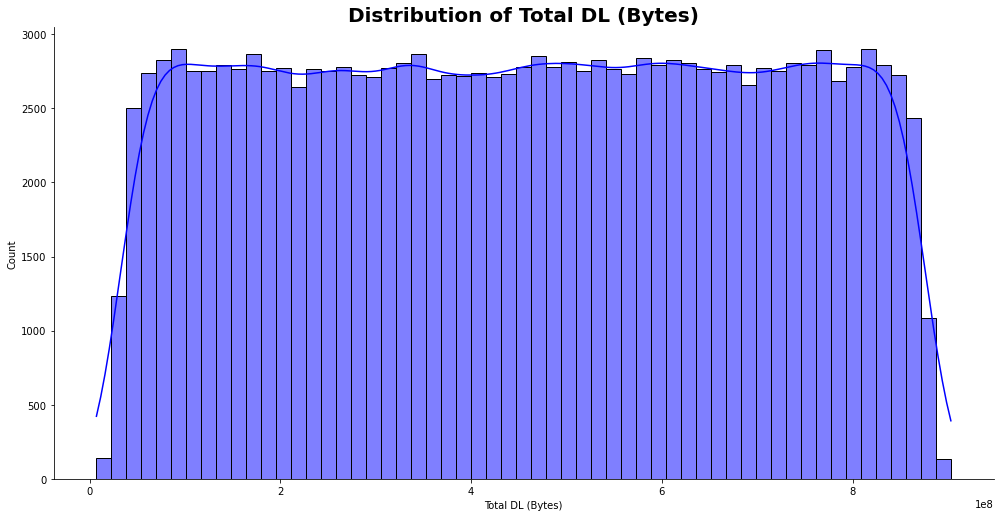

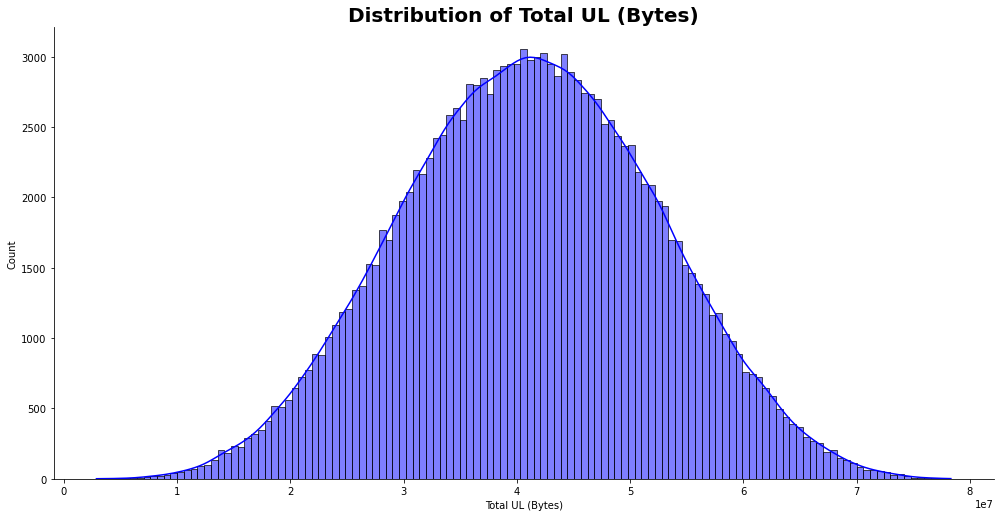

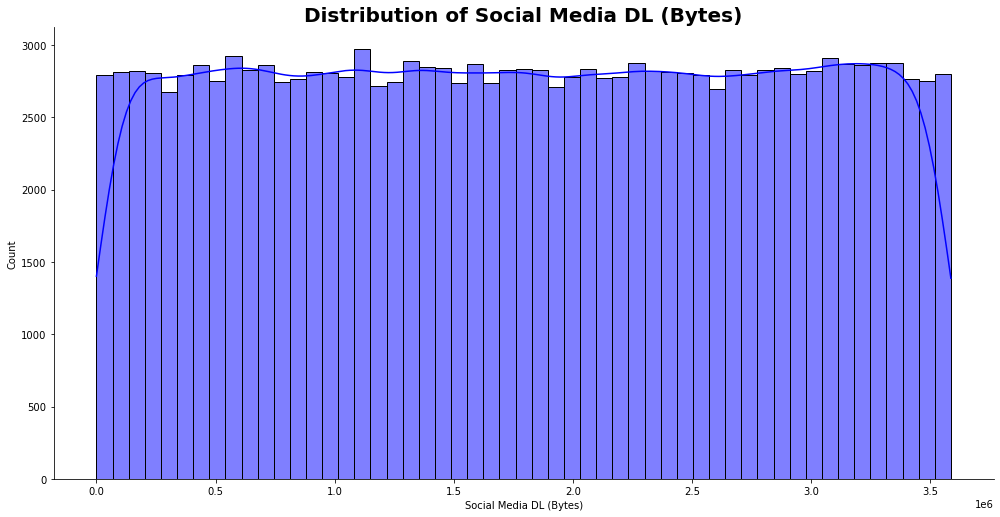

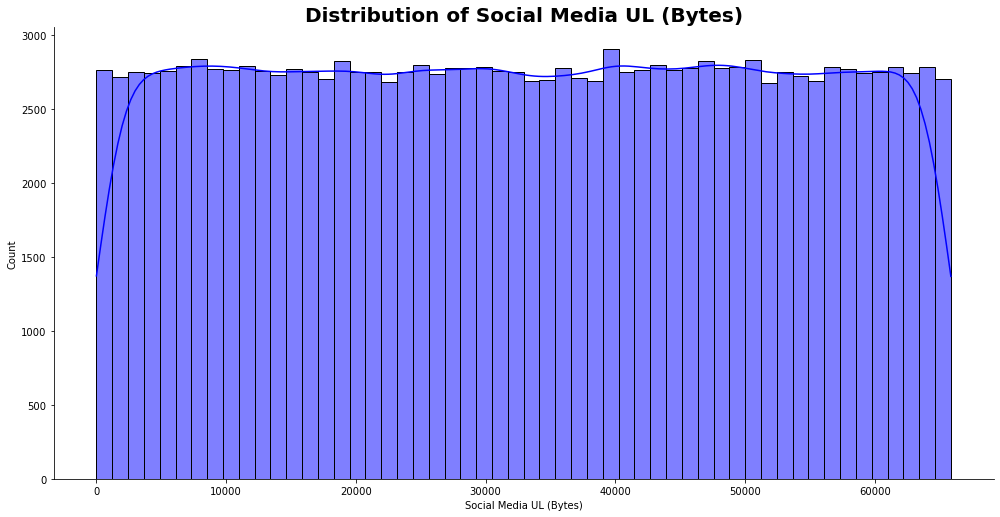

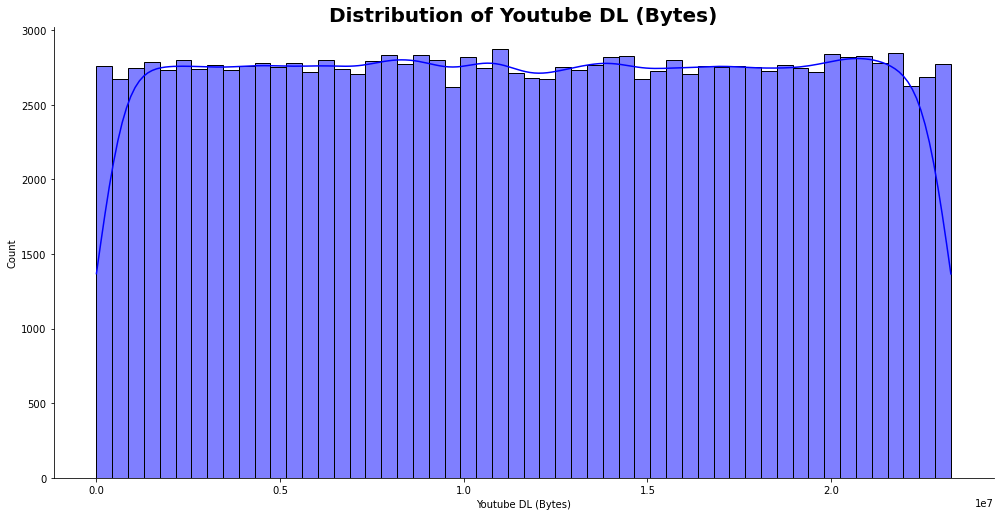

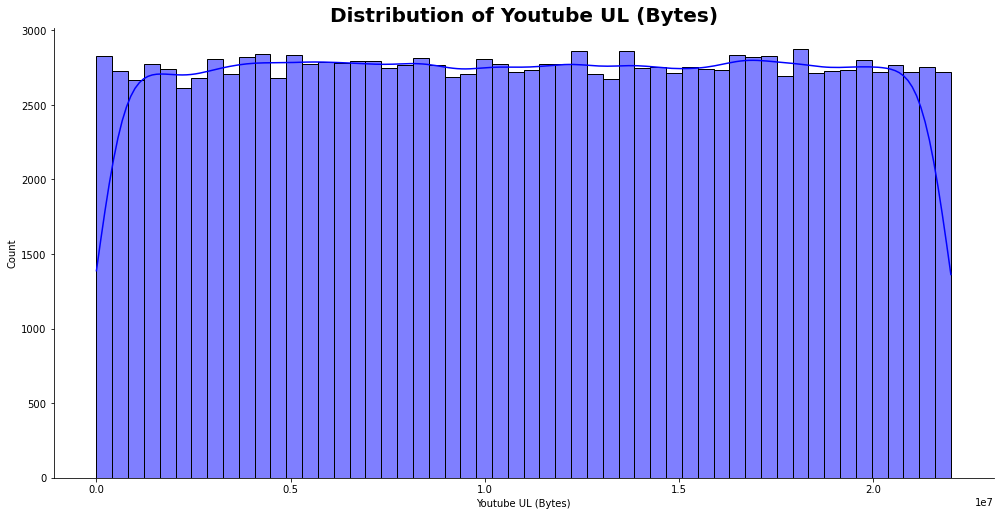

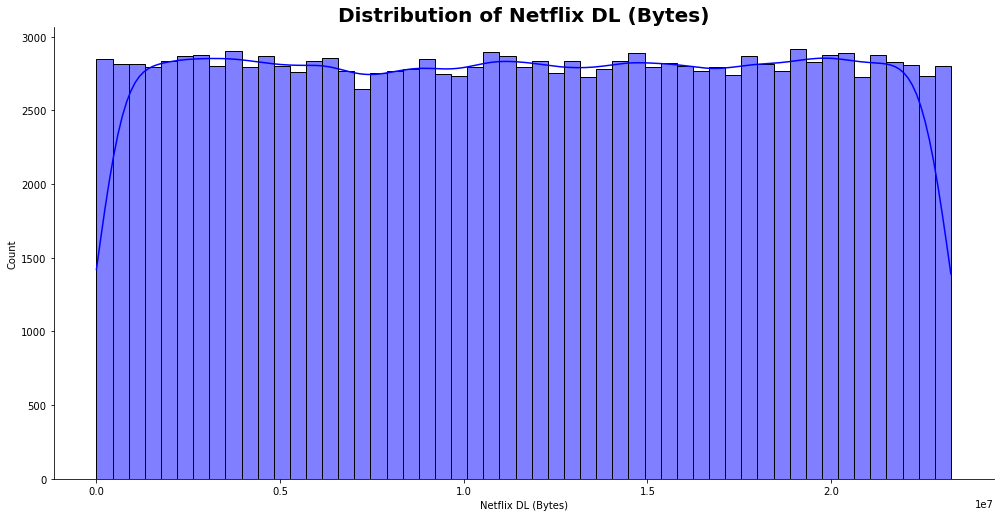

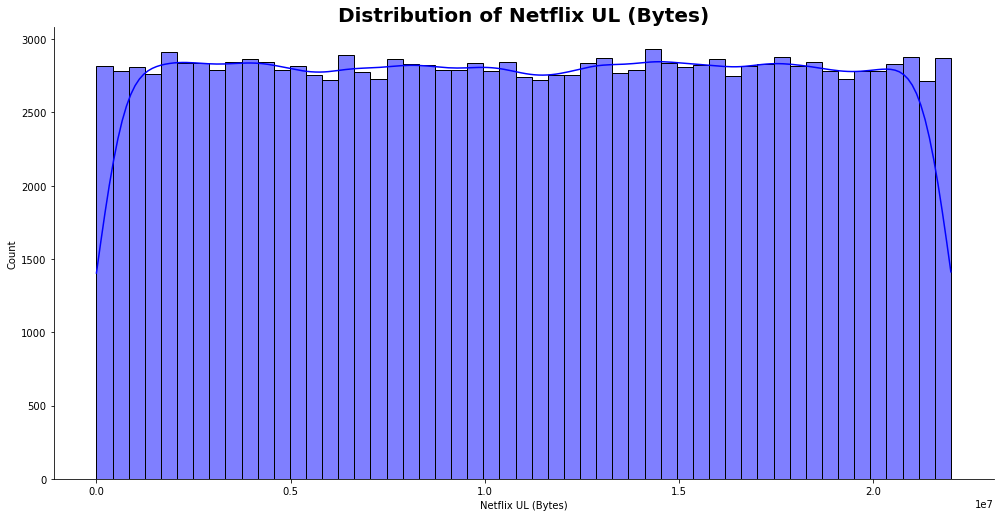

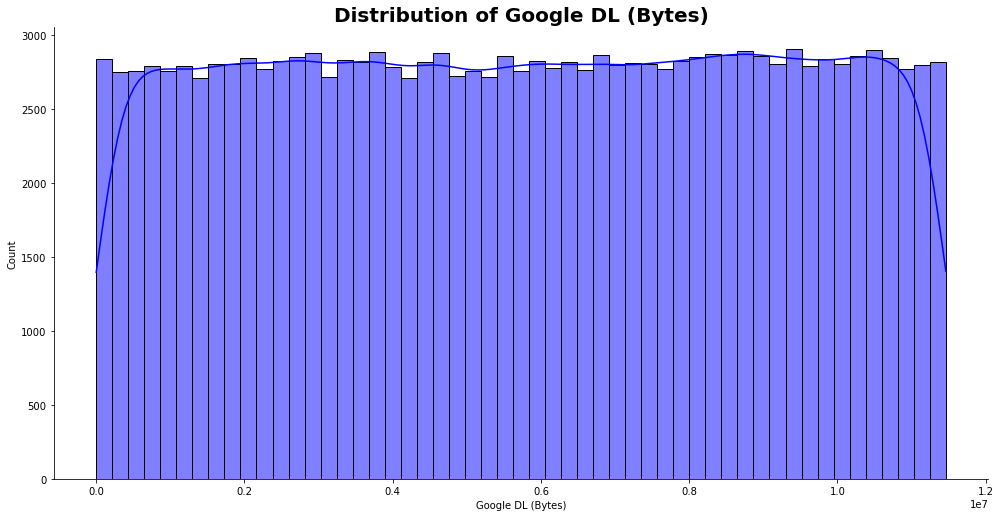

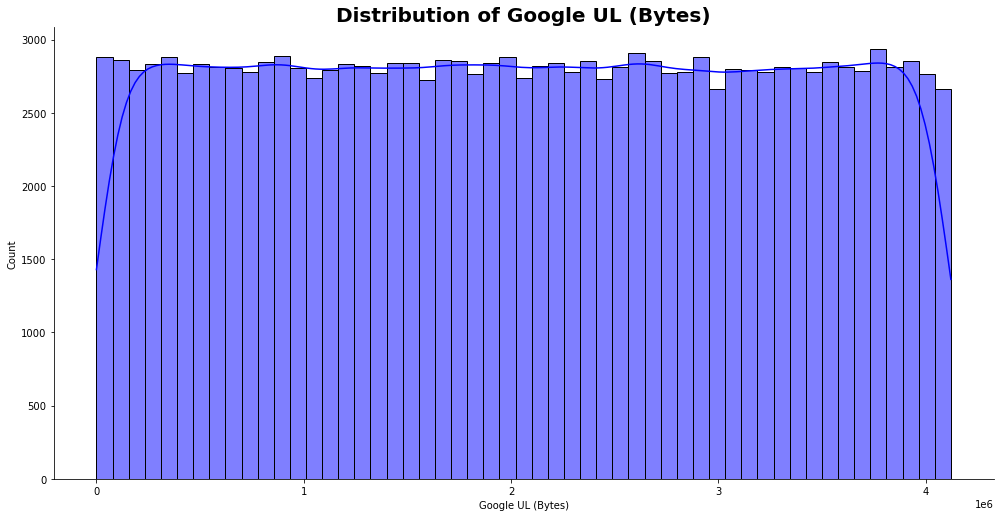

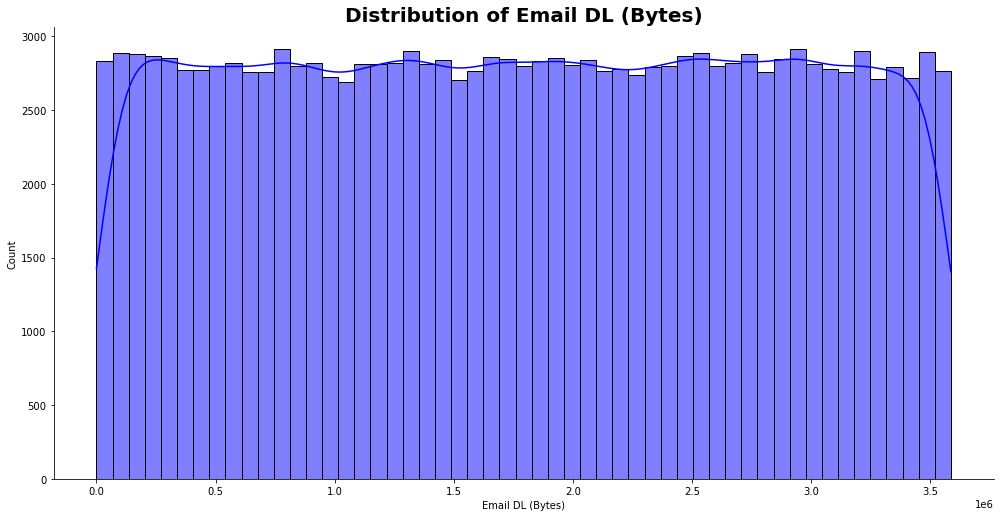

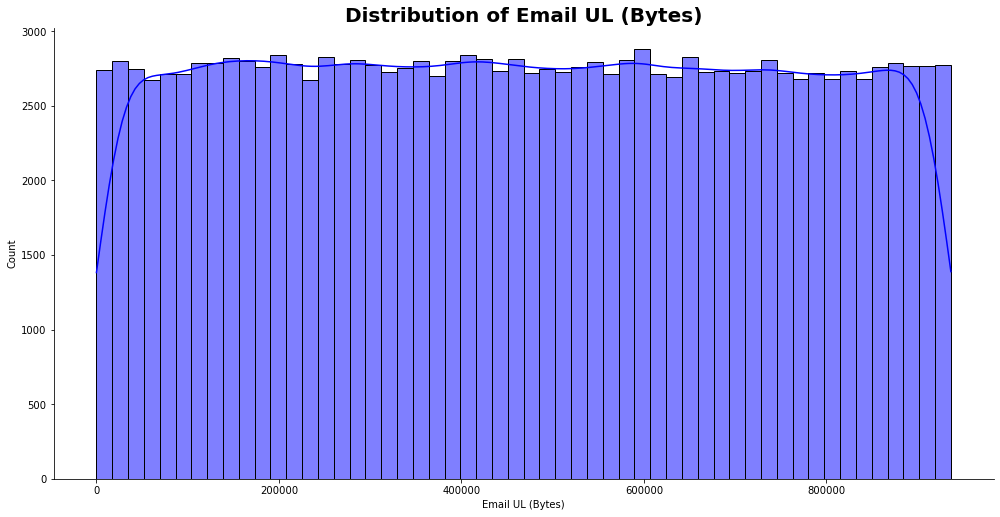

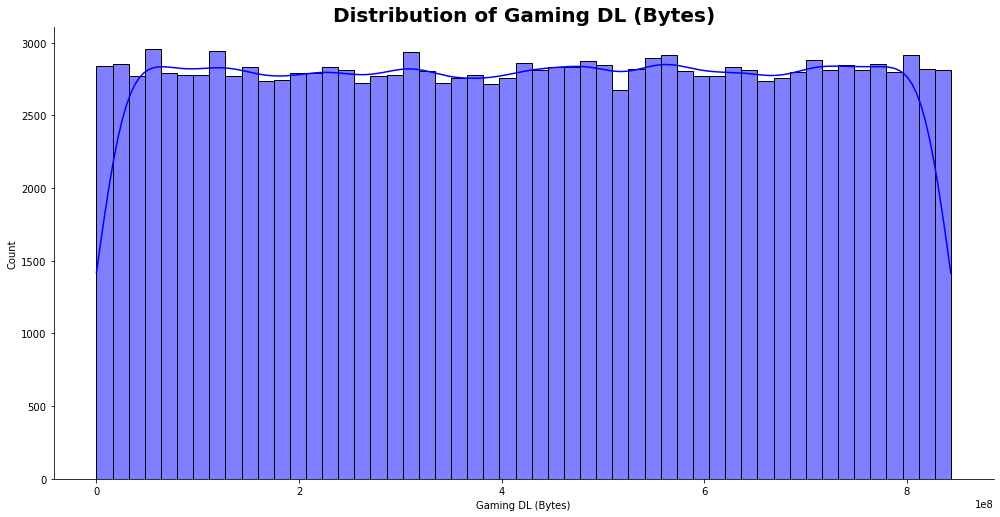

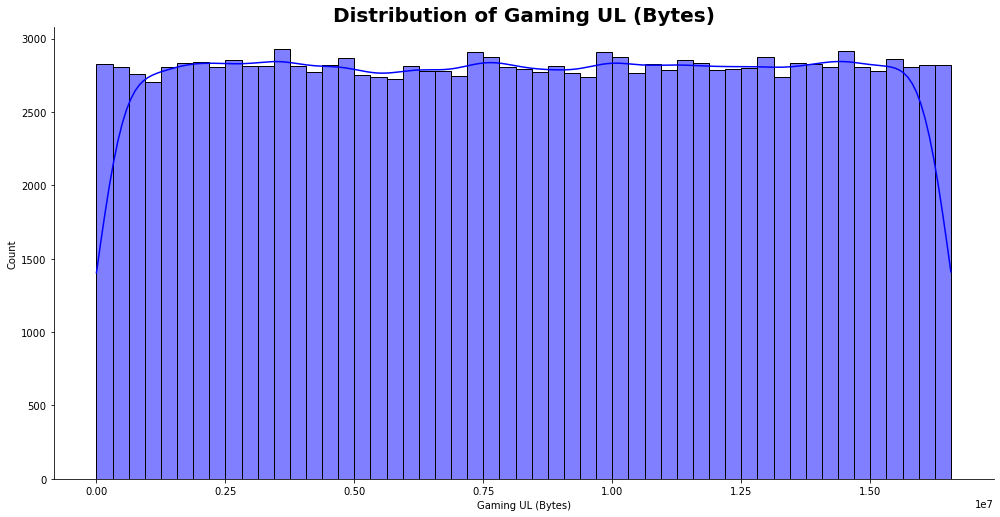

In [150]:
for colum in df_clean.columns.to_list():
    plot_hist(df_clean, colum, "blue")

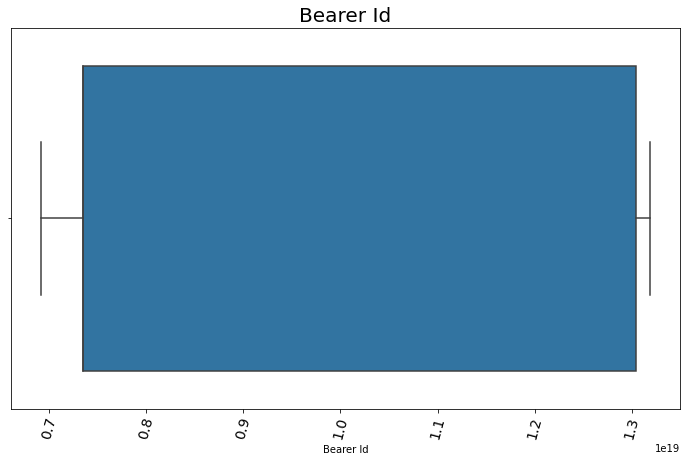

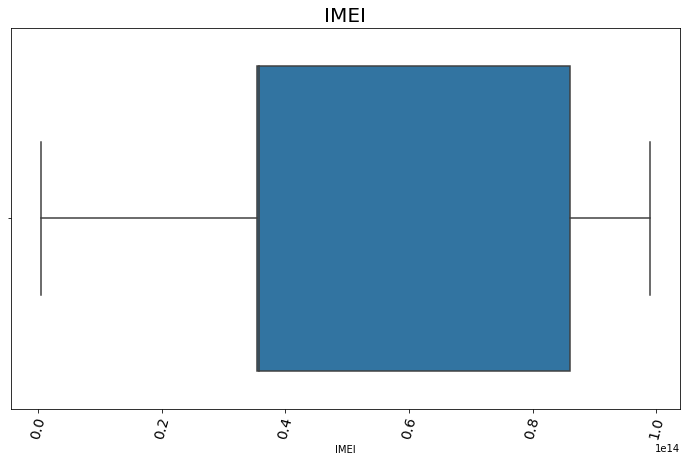

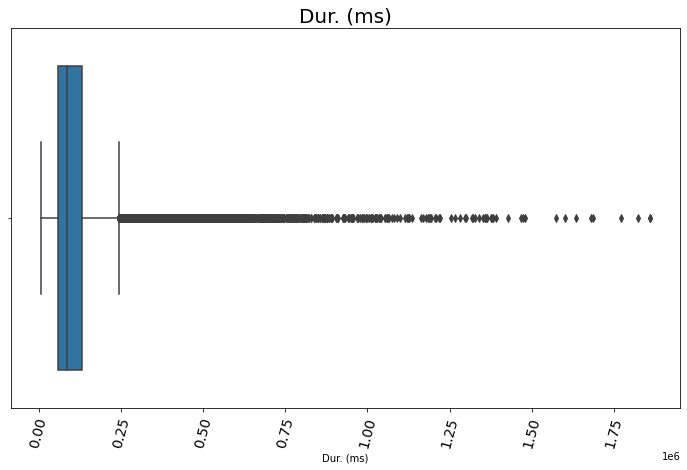

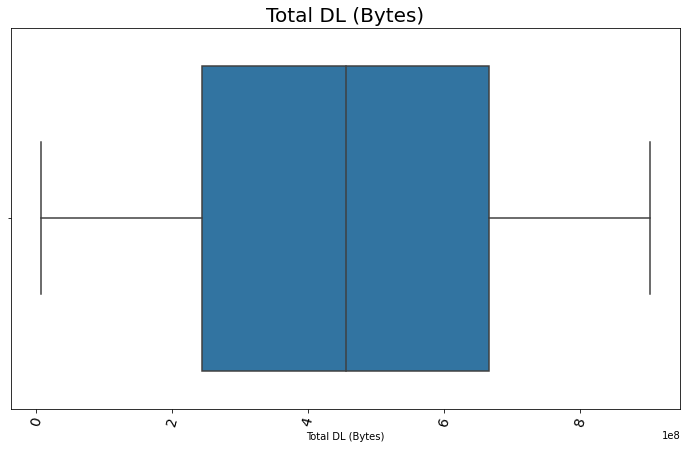

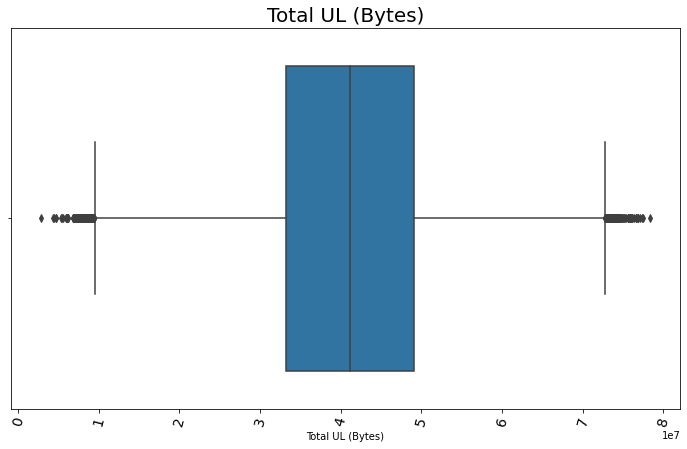

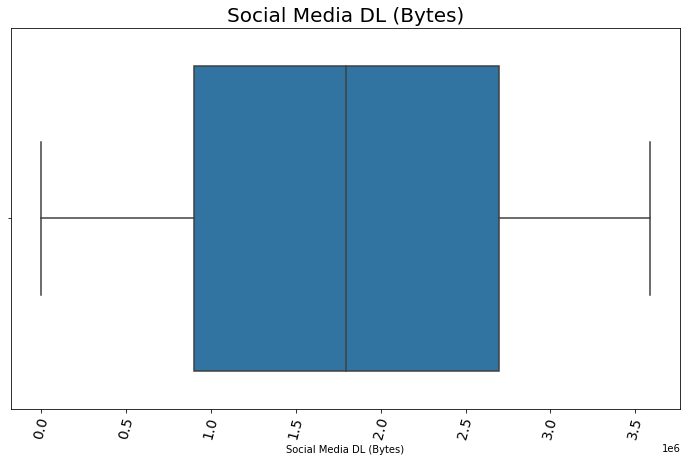

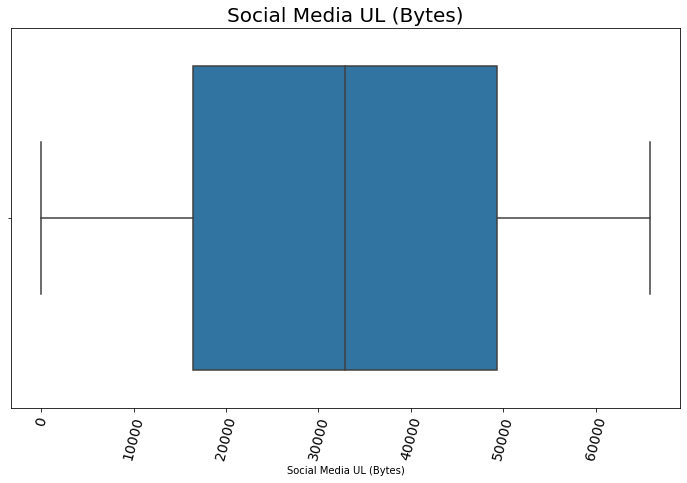

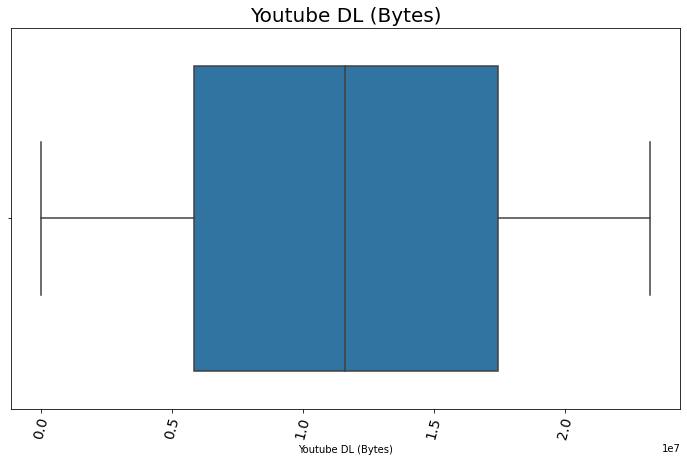

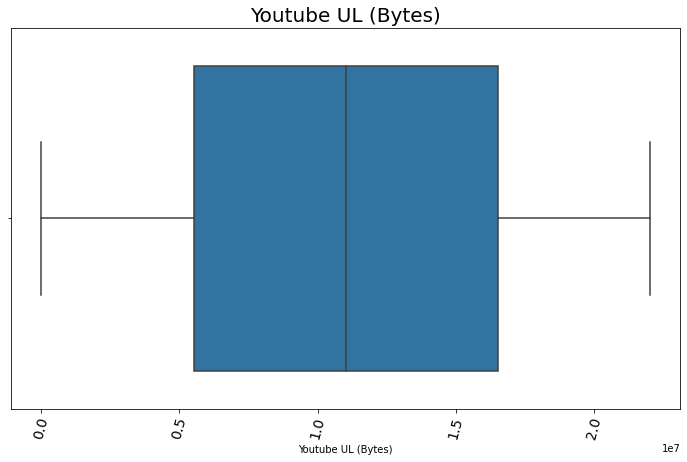

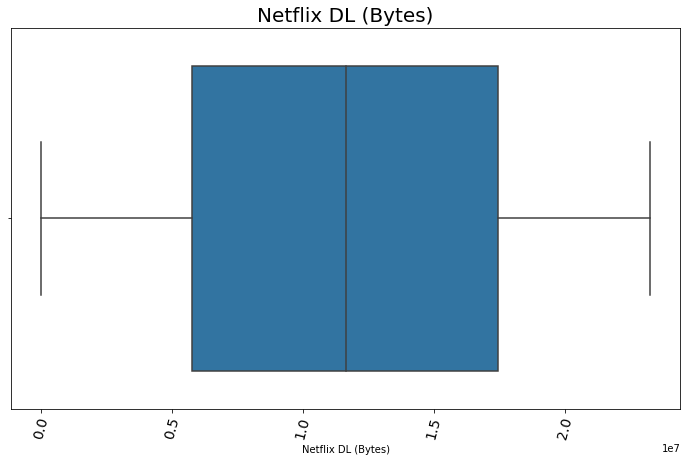

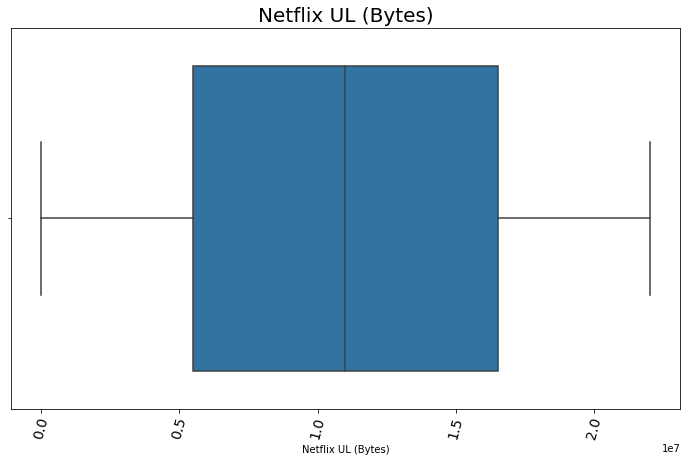

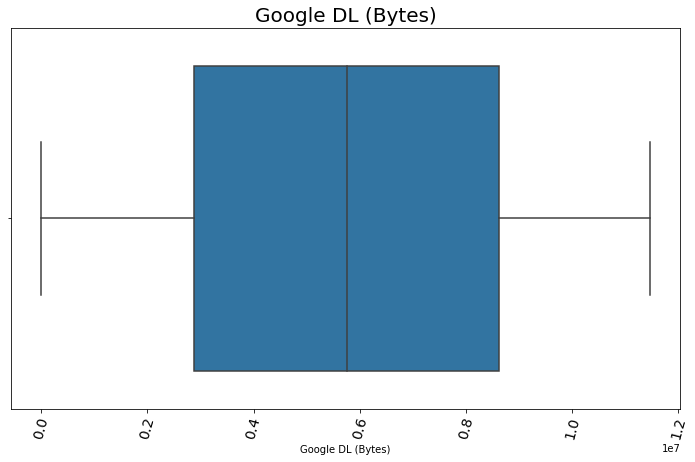

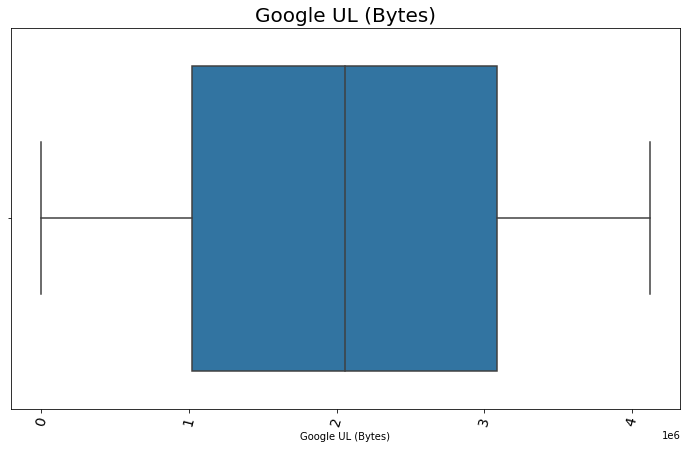

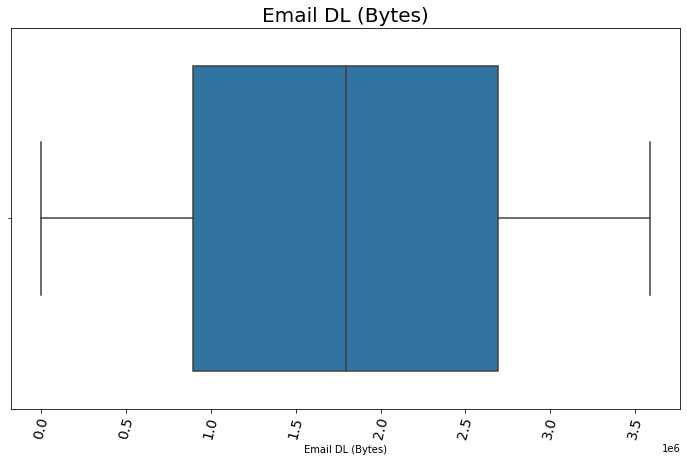

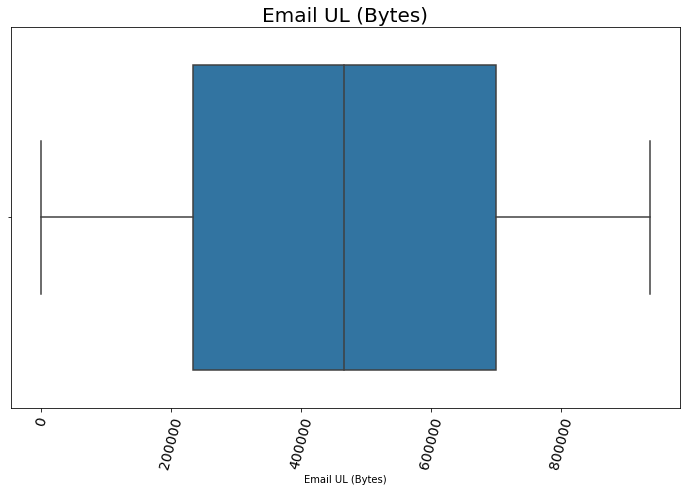

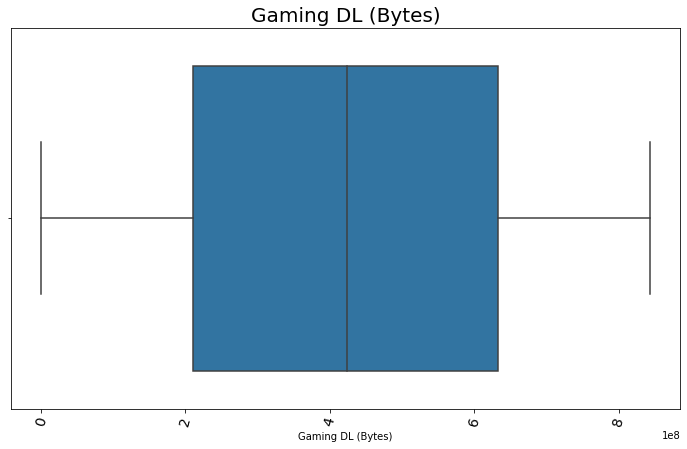

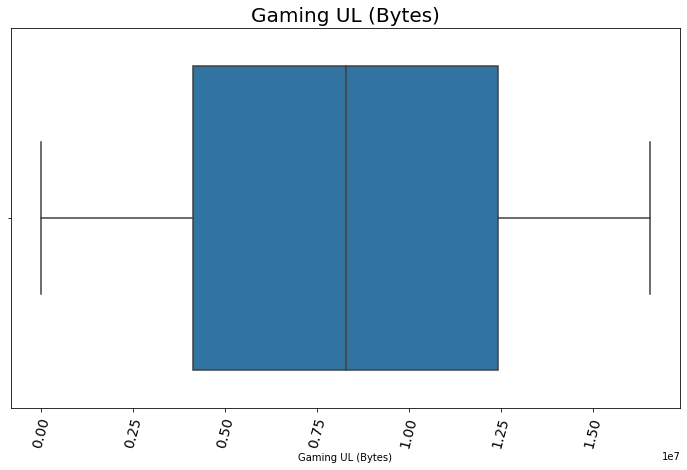

In [152]:
for colum in df_clean.columns.to_list():
    plot_box(df_clean, colum, f"{colum}")

In [193]:
df_clean

,Bearer Id,IMEI,Dur. (ms),Total DL (Bytes),Total UL (Bytes),Social Media DL (Bytes),Social Media UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes)
0,"13,114,483,460,844,900,352.00","35,521,209,507,511.00","1,823,652.00",308.88,36.75,1.55,0.02,15.85,2.50,8.20,9.66,1.63,1.27,3.56,0.14,278.08,14.34
1,"13,114,483,482,878,900,224.00","35,794,009,006,359.00","1,365,104.00",653.38,53.80,1.93,0.01,20.25,19.11,18.34,17.23,3.49,0.92,0.63,0.31,608.75,1.17
2,"13,114,483,484,080,500,736.00","35,281,510,359,387.00","1,361,762.00",279.81,27.88,1.68,0.04,19.73,14.70,17.59,6.16,8.54,1.69,2.69,0.67,229.58,0.40
3,"13,114,483,485,442,799,616.00","35,356,610,164,913.00","1,321,509.00",846.03,43.32,0.64,0.01,21.39,15.15,13.99,1.10,9.02,2.79,1.44,0.63,799.54,10.85
4,"13,114,483,499,480,700,928.00","35,407,009,745,539.00","1,089,009.00",569.14,38.54,0.86,0.05,15.26,18.96,17.12,0.42,6.25,1.50,1.94,0.17,527.71,3.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,"13,042,425,979,329,300,480.00","35,332,510,508,318.00","59,587.00",819.02,53.75,0.96,0.03,6.55,18.00,22.47,7.15,1.14,0.13,3.46,0.82,784.44,12.72
149996,"7,277,825,670,196,679,680.00","35,483,109,451,938.00","81,230.00",574.18,57.63,3.46,0.05,16.19,11.76,17.88,19.68,9.97,2.82,0.06,0.63,526.61,9.20
149997,"7,349,883,264,234,609,664.00","35,660,508,296,467.00","97,970.00",666.65,39.14,2.34,0.01,13.88,8.29,19.35,21.29,2.23,2.19,1.95,0.17,626.89,4.74
149998,"13,114,483,573,367,300,096.00","35,721,209,870,907.00","98,249.00",592.79,34.91,1.25,0.01,22.66,1.86,9.96,5.07,3.85,2.73,1.53,0.53,553.54,13.39


In [195]:
df_apps_agg

,Social Media DL (Bytes),Social Media UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Dur. (ms)
IMEI,,,,,,,,,,,
"440,015,202,000.00",2.53,0.02,17.66,10.70,9.13,3.61,0.99,0.14,159.79,1.32,NaN
"440,213,760,252.00",1.30,0.01,16.14,5.12,8.52,1.51,2.59,0.69,86.96,4.19,NaN
"1,194,900,553,757.00",3.44,0.02,11.56,12.36,8.41,1.07,1.48,0.58,827.58,11.38,NaN
"1,198,200,957,179.00",2.16,0.05,17.90,19.54,5.16,1.79,1.64,0.02,743.03,11.58,NaN
"1,202,600,872,459.00",0.36,0.04,14.93,5.63,5.90,1.21,0.41,0.42,770.46,3.54,NaN
...,...,...,...,...,...,...,...,...,...,...,...
"99,001,201,170,334.00",2.55,0.02,23.03,3.29,6.69,1.61,3.07,0.26,810.40,8.03,NaN
"99,001,201,173,604.00",1.82,0.04,7.66,16.26,10.32,3.96,0.86,0.41,253.04,5.81,NaN
"99,001,201,174,446.00",1.19,0.01,7.76,18.20,8.42,0.22,2.54,0.71,313.94,14.48,NaN


Variable transformations – segment the users into top five decile classes based on the total duration for all sessions and compute the total data (DL+UL) per decile class. 

In [249]:
df_apps_agg.sort_values(by=['Dur. (ms)'] ,ascending=False).head(5)

,Social Media DL (Bytes),Social Media UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes)
Dur. (ms),,,,,,,,,,
"1,859,336.00",2.70,0.01,10.16,6.43,1.50,0.31,0.19,0.74,236.78,1.84
"1,859,327.00",0.63,0.05,11.80,3.80,9.08,1.90,2.79,0.61,828.37,16.33
"1,823,652.00",1.55,0.02,15.85,2.50,1.63,1.27,3.56,0.14,278.08,14.34
"1,772,931.00",0.86,0.07,3.65,7.43,7.20,0.28,0.26,0.08,319.12,14.59
"1,686,493.00",3.36,0.01,19.24,19.54,3.90,4.02,2.71,0.90,382.90,2.03


Correlation Analysis – compute a correlation matrix for the following variables and interpret your findings: Social Media data, Google data, Email data, Youtube data, Netflix data, Gaming data, Other data 


In [246]:
list_corr=['Social Media DL (Bytes)', 'Social Media UL (Bytes)',
       'Youtube DL (Bytes)', 'Youtube UL (Bytes)', 'Netflix DL (Bytes)',
       'Netflix UL (Bytes)', 'Google DL (Bytes)', 'Google UL (Bytes)',
       'Email DL (Bytes)', 'Email UL (Bytes)', 'Gaming DL (Bytes)',
       'Gaming UL (Bytes)','total DL+UL']
df_corr=df_clean_bytes_1[list_corr].corr()
df_corr

,Social Media DL (Bytes),Social Media UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),total DL+UL
Social Media DL (Bytes),1.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,0.01,-0.00,0.00,0.00,0.01
Social Media UL (Bytes),-0.00,1.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00
Youtube DL (Bytes),-0.00,-0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,0.03
Youtube UL (Bytes),0.00,-0.00,0.00,1.00,0.00,0.00,0.00,0.00,-0.00,-0.01,-0.00,0.00,0.02
Netflix DL (Bytes),-0.00,-0.00,0.00,0.00,1.00,0.00,0.00,-0.00,0.00,0.00,-0.00,-0.00,0.02
Netflix UL (Bytes),0.00,-0.00,0.00,0.00,0.00,1.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,0.02
Google DL (Bytes),-0.00,0.00,0.00,0.00,0.00,-0.00,1.00,0.00,0.00,0.00,-0.00,-0.00,0.01
Google UL (Bytes),-0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,1.00,-0.00,-0.00,0.00,-0.00,0.01
Email DL (Bytes),0.01,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,1.00,0.00,0.00,-0.00,0.00
Email UL (Bytes),-0.00,-0.00,-0.00,-0.01,0.00,0.00,0.00,-0.00,0.00,1.00,-0.00,0.00,-0.00


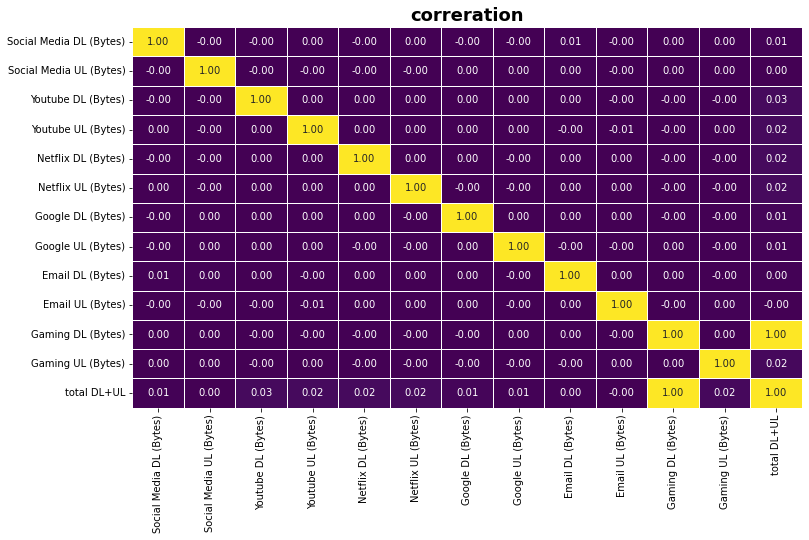

In [247]:
plot_heatmap(df_corr, 'correration')

In [ ]:
# Only gaming is correrated to total DL+UL

Dimensionality Reduction – perform a principal component analysis to reduce the dimensions of your data and provide a useful interpretation of the results (Provide your interpretation in four (4) bullet points-maximum). 

In [184]:
df_corr

,Social Media DL (Bytes),Youtube DL (Bytes),Netflix DL (Bytes),Google DL (Bytes),Email DL (Bytes),Gaming DL (Bytes),total DL+UL
Social Media DL (Bytes),1.00,-0.00,-0.00,-0.00,0.01,0.00,0.01
Youtube DL (Bytes),-0.00,1.00,0.00,0.00,0.00,-0.00,0.03
Netflix DL (Bytes),-0.00,0.00,1.00,0.00,0.00,-0.00,0.02
Google DL (Bytes),-0.00,0.00,0.00,1.00,0.00,-0.00,0.01
Email DL (Bytes),0.01,0.00,0.00,0.00,1.00,0.00,0.00
Gaming DL (Bytes),0.00,-0.00,-0.00,-0.00,0.00,1.00,1.00
total DL+UL,0.01,0.03,0.02,0.01,0.00,1.00,1.00
